<a href="https://colab.research.google.com/github/dilrubashowkat/cs6140project/blob/main/cs6140Project_Swell_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
dpath = '/content/drive/MyDrive/cs6140/project'   # Configure your own data path
os.chdir(dpath)

Mounted at /content/drive


In [ ]:
ls

 1ResearchProjectData.sav                   project.gdoc
'Copy of DM Project 2 Presentation .pptx'   Stress-Lysis.csv
 cs6140DataTesting.ipynb                    test.csv
 cs6140Project_Swell_Dataset.ipynb          test.csv.zip
 heart_2020_cleaned.csv                     train.csv
 heart_2020_cleaned.csv.zip                 train.csv.zip
 kaggle.json


# Importing all libraries

In [ ]:
from sklearn import svm
from scipy import io
import numpy as np
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from scipy.spatial import distance
import time
import pickle
import os
from sklearn.metrics import roc_curve, auc, accuracy_score, roc_auc_score, f1_score
import pandas as pd
import statistics
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from numpy import array
from sklearn.model_selection import KFold
import random
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn import preprocessing
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import requests, gzip, os, hashlib
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.optim import SGD
from torch.utils.data import random_split
from torch import Tensor
from torch.nn import Linear
from torch.nn import ReLU
from torch.nn import Sigmoid
from torch.nn import Module
from numpy import vstack
from numpy import argmax
from pandas import read_csv
import torchvision
from torch.utils.data import Dataset, DataLoader
import math
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn import metrics
from torch.utils.data import random_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.feature_selection import SelectKBest
from numpy import set_printoptions
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.ensemble import GradientBoostingClassifier


# printing methods

In [ ]:
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
  from sklearn.preprocessing import LabelBinarizer
  lb = LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(y_pred)
  return roc_auc_score(y_test, y_pred, average=average)

In [ ]:
def calculate_accuracy_auc_f1score(T, P):
  FPr, TPr, th = roc_curve(T, P, pos_label=2)
  auc_ = multiclass_roc_auc_score(T,P)
  cf_matrix = metrics.confusion_matrix(y_true=T, y_pred=P)
  print(cf_matrix)
  sns.heatmap(cf_matrix, annot=True,cmap='Oranges')
  
  plt.figure(figsize=(3, 3), dpi=100)
  plt.plot(FPr, TPr, linestyle='-', label=' (auc = %0.3f)' % auc_)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.legend()
  plt.show()
  return accuracy_score(T, P), f1_score(T, P, average='macro'),auc_


In [ ]:
from __future__ import division
def mean(a):
  avg = sum(a)/len(a)
  return avg

# Swell dataset


# Loading dataset, reading test/training dataset

In [ ]:
!unzip train.csv.zip

In [ ]:
!unzip test.csv.zip

In [ ]:
df_train = pd.read_csv('train.csv',dtype=str)
df_test = pd.read_csv('test.csv',dtype=str)


count samples per class

In [ ]:
df_train['condition'].value_counts()

no stress        200082
interruption     105150
time pressure     64057
Name: condition, dtype: int64

In [ ]:
df_test['condition'].value_counts()

no stress        22158
interruption     11782
time pressure     7093
Name: condition, dtype: int64

In [ ]:
df_train.shape, df_test.shape

((369289, 36), (41033, 36))

In [ ]:
df_train[0:5]

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,sampen,higuci,datasetId,condition
0,885.1578445866667,853.76373,140.9727412356706,15.55450455844723,15.55337133749991,9.06314570843159,69.49995211314423,11.13333333333333,0.5333333333333333,11.00156458989638,...,15.52260250018865,0.4210471422841141,1.514737148791649,3686.666157138838,65.0180547362775,0.01538034326090103,2.139754004084331,1.16348520443103,2,no stress
1,939.4253707266668,948.357865,81.3177420306631,12.964439460159,12.96419467067471,6.272368526272233,64.36314993344149,5.6,0.0,9.170129223465478,...,2.108525418184262,0.07013252485297729,0.3046025735625027,3006.487250536725,327.2966352859147,0.003055332356614163,2.17449878482957,1.084710589600687,2,interruption
2,898.1860468266667,907.00686,84.49723584848404,16.30527866953465,16.30527369768982,5.182201271197013,67.45006558887458,13.06666666666667,0.2,11.53341727967178,...,13.76972943692443,0.5126711618223939,1.049528181355908,2685.879460817948,94.28090981874143,0.01060660108098805,2.1353497073074,1.176314829766625,2,interruption
3,881.7578645266667,893.46003,90.37053723913102,15.72046848681109,15.72006805805942,5.74859059161937,68.80956180311732,11.8,0.1333333333333333,11.11947630809331,...,18.18191347593263,0.5293871715870679,1.775293904352013,3434.520980443188,55.32870126735455,0.01807380215139855,2.178340631129962,1.179688139016405,2,no stress
4,809.6253311400001,811.184865,62.76624216006202,19.21381886895778,19.21365745423712,3.266723944268486,74.56572751929652,20.2,0.2,13.59064146956268,...,48.21582240223309,1.839473467070875,3.279992662596144,2621.175203957172,29.48787307982851,0.03391224579992039,2.221120909310345,1.249611573893797,2,no stress


In [ ]:
df_train=df_train.drop(['sampen','higuci','datasetId'],axis=1) 
df_test=df_test.drop(['sampen','higuci','datasetId'],axis=1)

In [ ]:
df_train.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'condition'],
      dtype='object')

In [ ]:
df_test.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'condition'],
      dtype='object')

# encoding three classes

In [ ]:
le = preprocessing.LabelEncoder()
le.fit(df_train['condition'])
df_train['condition'] = le.transform(df_train['condition'])

In [ ]:
le1 = preprocessing.LabelEncoder()
le1.fit(df_test['condition'])
df_test['condition'] = le1.transform(df_test['condition'])

converting data to numeric

In [ ]:
df_train = df_train.apply(pd.to_numeric)
df_test = df_test.apply(pd.to_numeric)


In [ ]:
df_train.describe()

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,SD1,...,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,condition
count,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,...,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000,369289.000000
mean,846.650104,841.965890,109.352531,14.977498,14.976767,7.396597,73.941824,9.841143,0.866001,10.593708,...,946.530252,34.095182,95.566718,39.245603,1.615576,4.433282,3185.356025,115.977200,0.048506,0.888724
std,124.603984,132.321005,77.117025,4.120766,4.120768,5.143834,10.337453,8.195574,0.990189,2.914795,...,574.171780,16.040290,4.123365,45.398869,1.761073,4.123365,1923.227187,360.855129,0.049238,0.667694
min,547.492221,517.293295,27.233947,5.529742,5.529630,2.660381,48.737243,0.000000,0.000000,3.911344,...,90.048557,2.165119,69.879083,0.061783,0.002150,0.012825,377.692795,2.319952,0.000128,0.000000
25%,760.228533,755.750735,64.205641,11.830959,11.830671,4.541896,66.715776,3.666667,0.000000,8.368340,...,545.449386,22.305936,93.645734,10.720312,0.346803,1.228054,1828.147788,14.737458,0.012433,0.000000
50%,822.951438,819.689595,82.608243,14.415918,14.415388,5.952112,74.217809,7.600000,0.466667,10.196621,...,782.716291,32.047025,96.643140,24.841938,1.039513,3.356860,2796.856587,28.789747,0.034735,1.000000
75%,924.117422,916.821570,118.237002,17.927144,17.924839,7.919841,80.334937,13.333333,1.466667,12.679005,...,1201.432256,44.647115,98.771946,45.272368,2.245115,6.354266,4052.260157,80.429614,0.067854,1.000000
max,1322.016957,1653.122250,563.486949,26.629477,26.629392,54.523950,113.752309,39.400000,5.466667,18.836107,...,3291.548112,77.928847,99.987175,364.486936,13.095664,30.120917,13390.684098,7796.443096,0.431043,2.000000


In [ ]:
df_test.dtypes

dataset preparation for training/testing

In [ ]:
temp = df_train
stress_label = np.array(temp['condition'])
features = np.array(temp.drop(['condition'],axis=1))
X = features
y = stress_label

In [ ]:
temp_ = df_test
stress_label_ = np.array(temp_['condition'])
features_ = np.array(temp_.drop(['condition'],axis=1))
X_test = features_
y_test = stress_label_

In [ ]:
X.shape, y.shape

((369289, 32), (369289,))

# feature selection
1. *feature* importance
2. *PCA* 
3. *Select Kbest*

applying feature importance

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, y)

ExtraTreesClassifier(n_estimators=10)

In [ ]:
print(model.feature_importances_)

[0.05668205 0.05683335 0.02835392 0.02674916 0.03382144 0.03800193
 0.05684883 0.03905219 0.03916066 0.03285923 0.03180802 0.02350653
 0.02733568 0.00238541 0.03430429 0.02906632 0.03243967 0.03408144
 0.03714836 0.02270259 0.02510596 0.03168782 0.02720291 0.02905604
 0.03034687 0.02962784 0.02331215 0.02642616 0.02486092 0.02960124
 0.01813988 0.02149116]


In [ ]:
df_train.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'condition'],
      dtype='object')

In [ ]:
X_new = df_train[['MEAN_RR', 'MEDIAN_RR','HR', 'pNN25','pNN50']].copy()
X_new_test = df_test[['MEAN_RR', 'MEDIAN_RR','HR', 'pNN25','pNN50']].copy()

In [ ]:
X_new.shape

(369289, 5)

applying PCA

In [ ]:
pca = PCA(n_components=10) #5, 10
pca.fit(X)
X_trn = pca.transform(X)
X_tst = pca.transform(X_test)

In [ ]:
X_trn.shape, X_tst.shape

((369289, 10), (41033, 10))

applying select k-best

In [ ]:
# feature extraction
test = SelectKBest(score_func=f_classif, k=5) # select k best features
fit = test.fit(X, y)
# summarize scores
set_printoptions(precision=3)
print(fit.scores_)
features = fit.transform(X)
# summarize selected features
print(features[0:5,:])

[24414.593 22798.808  3120.924 10397.889 10399.849  2260.418 22482.299
 14102.176  3566.953 10399.849  3130.76   5669.76   2252.427   131.039
  2388.917  4536.185  5195.821  5195.825  9521.027  5669.76   2252.427
  9565.196  9450.16  10305.596  8999.489  8803.023  4833.659  7947.076
  8803.023  8676.939  7064.031  8025.2  ]
[[885.158 853.764  15.553  69.5    11.133]
 [939.425 948.358  12.964  64.363   5.6  ]
 [898.186 907.007  16.305  67.45   13.067]
 [881.758 893.46   15.72   68.81   11.8  ]
 [809.625 811.185  19.214  74.566  20.2  ]]


In [ ]:
df_train.columns

Index(['MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'HR',
       'pNN25', 'pNN50', 'SD1', 'SD2', 'KURT', 'SKEW', 'MEAN_REL_RR',
       'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR',
       'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR', 'VLF', 'VLF_PCT',
       'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF',
       'HF_LF', 'condition'],
      dtype='object')

# Gradiant Boosting Classifier

cross validation

In [ ]:
lr = [0.2, 0.3, 0.4, 0.5]

In [ ]:
temp1 = [] 
for j in range(len(lr)):
  print("Depth: " + str(lr[j]) + "\n")
  clf = GradientBoostingClassifier(n_estimators=100, learning_rate=lr[j], max_depth=1, random_state=0)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(clf, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp1.append(n_scores)
  print("Average " + str(mean(temp1)) + "STD " +str(std(temp1)) + "\n")

Depth: 0.2



running with all 32 parameters

Running built in Gradiant Boosting Classifier on SWELL dataset: 

[[ 3933  7284   565]
 [ 1215 20650   293]
 [  490  4250  2353]]


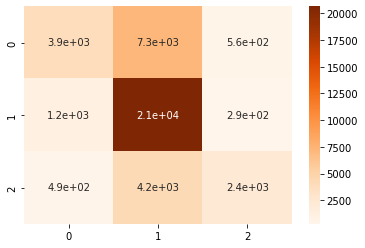

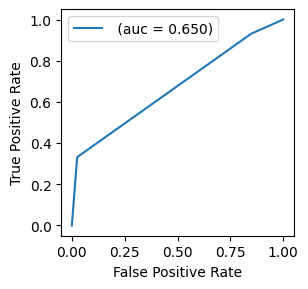

--- 702.5638597011566 seconds ---
              precision    recall  f1-score   support

           0       0.70      0.33      0.45     11782
           1       0.64      0.93      0.76     22158
           2       0.73      0.33      0.46      7093

    accuracy                           0.66     41033
   macro avg       0.69      0.53      0.56     41033
weighted avg       0.67      0.66      0.62     41033



In [ ]:
import time
start_time = time.time()
print("Running built in Gradiant Boosting Classifier on SWELL dataset: \n")
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X, y)
clf.score(X_test, y_test)
y_pred = clf.predict(X_test)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

running with top 5 features

Running built in Gradiant Boosting Classifier on SWELL dataset: 

[[ 2889  7597  1296]
 [ 1300 20327   531]
 [  122  4545  2426]]


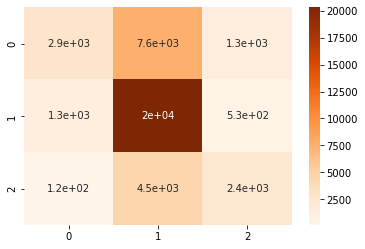

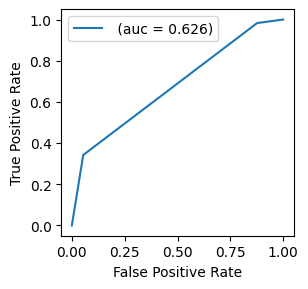

--- 115.3294894695282 seconds ---
              precision    recall  f1-score   support

           0       0.67      0.25      0.36     11782
           1       0.63      0.92      0.74     22158
           2       0.57      0.34      0.43      7093

    accuracy                           0.62     41033
   macro avg       0.62      0.50      0.51     41033
weighted avg       0.63      0.62      0.58     41033



In [ ]:
import time
start_time = time.time()
print("Running built in Gradiant Boosting Classifier on SWELL dataset: \n")
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_new, y)
clf.score(X_new_test, y_test)
y_pred = clf.predict(X_new_test)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

running on PCA transformed data

Running built in Gradiant Boosting Classifier on SWELL dataset: 

[[ 2896  8367   519]
 [  750 20986   422]
 [  706  4412  1975]]


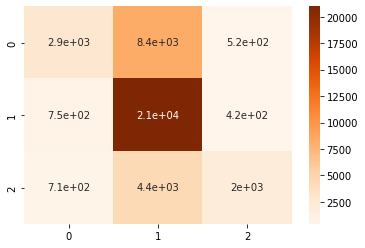

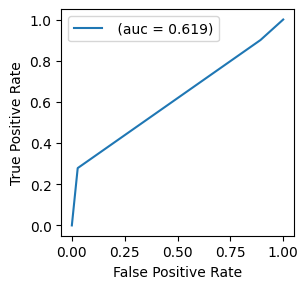

--- 165.53159976005554 seconds ---
              precision    recall  f1-score   support

           0       0.67      0.25      0.36     11782
           1       0.62      0.95      0.75     22158
           2       0.68      0.28      0.39      7093

    accuracy                           0.63     41033
   macro avg       0.65      0.49      0.50     41033
weighted avg       0.64      0.63      0.58     41033



In [ ]:
import time
start_time = time.time()
print("Running built in Gradiant Boosting Classifier on SWELL dataset: \n")
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0).fit(X_trn, y)
clf.score(X_tst, y_test)
y_pred = clf.predict(X_tst)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

# Multiclass Decision Tree 

with no feature selection: using 32 features




Running built in multinomial Decision Tree on SWELL dataset: 

[[11778     3     1]
 [   13 22139     6]
 [    3    11  7079]]


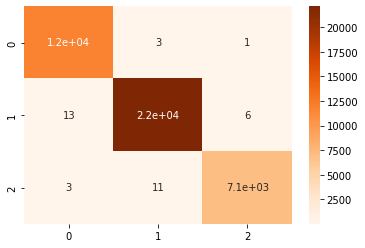

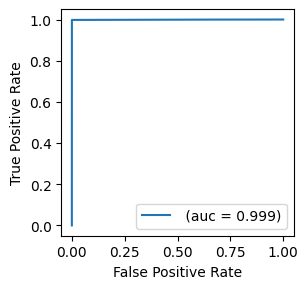

--- 30.533478498458862 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
import time
start_time = time.time()
print("Running built in multinomial Decision Tree on SWELL dataset: \n")
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=100, min_samples_leaf=5)
clf.fit(X, y)
y_pred = clf.predict(X_test)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

cross validation: on all 32 features

In [ ]:
depth = [1, 10, 20, 30,40, 50, 60, 70, 80, 90, 100]

In [ ]:
temp1 = [] 
for j in range(len(depth)):
  print("Depth: " + str(depth[j]) + "\n")
  clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=depth[j], min_samples_leaf=5)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(clf, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp1.append(n_scores)
  print("Average " + str(mean(temp1)) + "STD " +str(std(temp1)) + "\n")

Depth: 1

Average [0.5418235  0.5418235  0.54179642 0.54179642 0.54179642 0.54179642
 0.54179642 0.54179642 0.54179642 0.54181109 0.5418235  0.5418235
 0.54179642 0.54179642 0.54179642 0.54179642 0.54179642 0.54179642
 0.54179642 0.54181109 0.5418235  0.5418235  0.54179642 0.54179642
 0.54179642 0.54179642 0.54179642 0.54179642 0.54179642 0.54181109]STD 1.0991130960039588e-05

Depth: 10

Average [0.72689485 0.72793739 0.71786401 0.72230496 0.727802   0.72150613
 0.7245796  0.72468791 0.72640743 0.72439612 0.71917734 0.72271115
 0.72490455 0.72426819 0.72150613 0.72833004 0.72907471 0.72671884
 0.72479623 0.726901   0.72402448 0.72873622 0.72763952 0.71997617
 0.72174984 0.72250806 0.72785616 0.7230361  0.7241328  0.71873646]STD 0.18262056095947585

Depth: 20

Average [0.81747859 0.81820069 0.81108794 0.81428326 0.81817361 0.81385903
 0.8148429  0.81585385 0.81715364 0.81496425 0.81176492 0.81471653
 0.81542058 0.81481582 0.81383195 0.81854369 0.81903111 0.81734319
 0.81542961 0.8174736

cross validation: feature importance data

In [ ]:
depth = [1, 10, 20, 30,40, 50, 60, 70, 80, 90, 100]

In [ ]:
temp1 = [] 
for j in range(len(depth)):
  print("Depth: " + str(depth[j]) + "\n")
  clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=depth[j], min_samples_leaf=5)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(clf, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp1.append(n_scores)
  print("Average " + str(mean(temp1)) + "STD " +str(std(temp1)) + "\n")

Depth: 1

Average [0.5418235  0.5418235  0.54179642 0.54179642 0.54179642 0.54179642
 0.54179642 0.54179642 0.54179642 0.54181109 0.5418235  0.5418235
 0.54179642 0.54179642 0.54179642 0.54179642 0.54179642 0.54179642
 0.54179642 0.54181109 0.5418235  0.5418235  0.54179642 0.54179642
 0.54179642 0.54179642 0.54179642 0.54179642 0.54179642 0.54181109]STD 1.0991130960039588e-05

Depth: 10

Average [0.69330337 0.69402096 0.68823959 0.69418343 0.69435945 0.69569986
 0.68814482 0.69291072 0.6934523  0.69141302 0.69043299 0.69288364
 0.68951231 0.69085272 0.69498226 0.69597065 0.69299196 0.69586233
 0.69144846 0.69605719 0.69467085 0.69483333 0.69580817 0.69429175
 0.69337106 0.68781987 0.69537491 0.69415635 0.69112351 0.68869151]STD 0.1511336319272192

Depth: 20

Average [0.79292697 0.79391084 0.78918104 0.79371226 0.79389279 0.79475029
 0.78849504 0.79202433 0.79282768 0.79077304 0.7907426  0.79264715
 0.78966846 0.79068844 0.79382057 0.79441631 0.79286378 0.79489471
 0.79118489 0.7948711 

running with best params

Running built in multinomial Decision Tree on SWELL dataset: 

[[11754    23     5]
 [   25 22110    23]
 [    3    21  7069]]


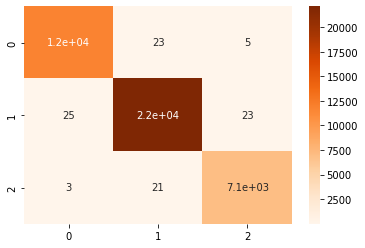

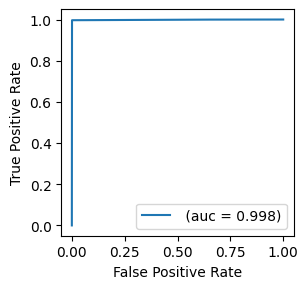

--- 5.29602313041687 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
import time
start_time = time.time()
print("Running built in multinomial Decision Tree on SWELL dataset: \n")
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=100, min_samples_leaf=5)
clf.fit(X_new, y)
y_pred = clf.predict(X_new_test)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

cross validation: PCA transformed data

In [ ]:
depth = [1, 10, 20, 30,40, 50, 60, 70, 80, 90, 100]

In [ ]:
temp1 = [] 
for j in range(len(depth)):
  print("Depth: " + str(depth[j]) + "\n")
  clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=depth[j], min_samples_leaf=5)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(clf, X_trn, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp1.append(n_scores)
  print("Average " + str(mean(temp1)) + "STD " +str(std(temp1)) + "\n")

Depth: 1

Average [0.5418235  0.5418235  0.54179642 0.54179642 0.54179642 0.54179642
 0.54179642 0.54179642 0.54179642 0.54181109 0.5418235  0.5418235
 0.54179642 0.54179642 0.54179642 0.54179642 0.54179642 0.54179642
 0.54179642 0.54181109 0.5418235  0.5418235  0.54179642 0.54179642
 0.54179642 0.54179642 0.54179642 0.54179642 0.54179642 0.54181109]STD 1.0991130960039588e-05

Depth: 10

Average [0.69189526 0.69134014 0.68953939 0.69525305 0.69385849 0.69048715
 0.69326275 0.69495518 0.68907904 0.69386373 0.69320859 0.69521243
 0.68901135 0.69380433 0.69555092 0.69147553 0.69207127 0.69180048
 0.69375017 0.69528542 0.69089334 0.69039237 0.69123182 0.69323567
 0.69044653 0.69349292 0.69364185 0.69460316 0.69541553 0.69447303]STD 0.15097352467796907

Depth: 20

Average [0.79173549 0.79132931 0.79020102 0.79391986 0.79277352 0.79082383
 0.79267423 0.79409136 0.7899212  0.79292136 0.79302626 0.79405526
 0.78974067 0.79316165 0.79438923 0.79120294 0.79181673 0.7919792
 0.79307139 0.79382402

running with best params

Running built in multinomial Decision Tree on SWELL dataset: 

[[11733    39    10]
 [   60 22037    61]
 [    9    53  7031]]


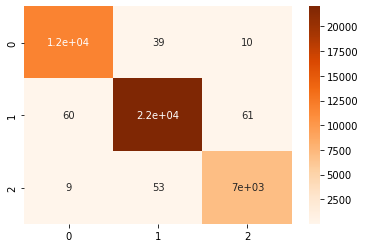

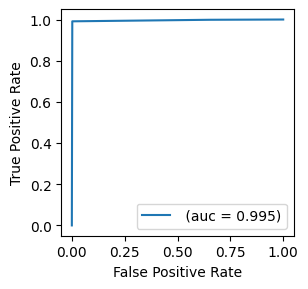

--- 6.162219285964966 seconds ---
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11782
           1       1.00      0.99      1.00     22158
           2       0.99      0.99      0.99      7093

    accuracy                           0.99     41033
   macro avg       0.99      0.99      0.99     41033
weighted avg       0.99      0.99      0.99     41033



In [ ]:
import time
start_time = time.time()
print("Running built in multinomial Decision Tree on SWELL dataset: \n")
clf = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100, max_depth=100, min_samples_leaf=5)
clf.fit(X_trn, y)
y_pred = clf.predict(X_tst)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

# Multinomial Naive Bayes

with no feature selection: using 32 features


Running built in multinomial NB on SWELL dataset: 

[[ 4343  4980  2459]
 [ 3713 13633  4812]
 [  907  2215  3971]]


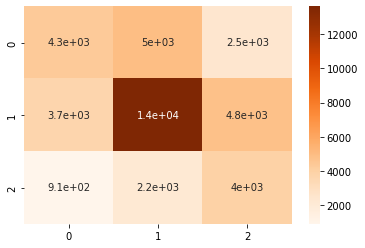

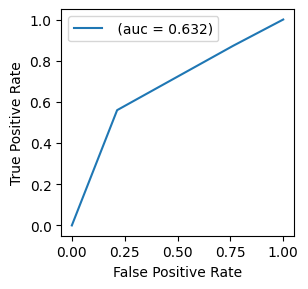

--- 0.7776117324829102 seconds ---
              precision    recall  f1-score   support

           0       0.48      0.37      0.42     11782
           1       0.65      0.62      0.63     22158
           2       0.35      0.56      0.43      7093

    accuracy                           0.53     41033
   macro avg       0.50      0.51      0.50     41033
weighted avg       0.55      0.53      0.54     41033



In [ ]:
import time
start_time = time.time()
print("Running built in multinomial NB on SWELL dataset: \n")
clf = GaussianNB()
clf.fit(X, y)
y_pred = clf.predict(X_test)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

running with PCA transformed data

Running built in Gaussian NB on SWELL dataset: 

[[ 2541  7933  1308]
 [ 1891 19760   507]
 [  553  5322  1218]]


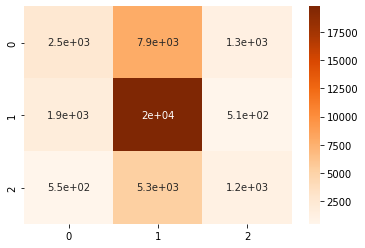

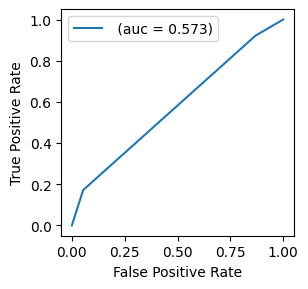

--- 0.6572072505950928 seconds ---
              precision    recall  f1-score   support

           0       0.51      0.22      0.30     11782
           1       0.60      0.89      0.72     22158
           2       0.40      0.17      0.24      7093

    accuracy                           0.57     41033
   macro avg       0.50      0.43      0.42     41033
weighted avg       0.54      0.57      0.52     41033



In [ ]:
import time
start_time = time.time()
print("Running built in Gaussian NB on SWELL dataset: \n")
clf = GaussianNB()
clf.fit(X_trn, y)
y_pred = clf.predict(X_tst)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

Cross validation: with feature extracted data

In [ ]:
param_grid_nb = {'var_smoothing': np.logspace(0,-9, num=100)}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_new, y)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=0.001873817422860383)


Running built in multinomial NB on SWELL dataset: 

[[ 2776  6999  2007]
 [  957 18735  2466]
 [  202  3601  3290]]


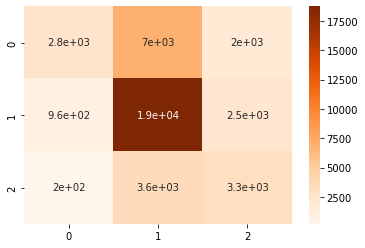

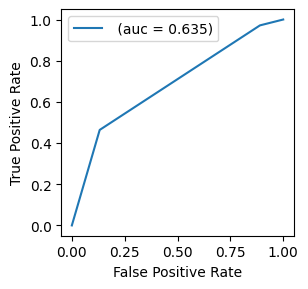

--- 0.5889260768890381 seconds ---
              precision    recall  f1-score   support

           0       0.71      0.24      0.35     11782
           1       0.64      0.85      0.73     22158
           2       0.42      0.46      0.44      7093

    accuracy                           0.60     41033
   macro avg       0.59      0.51      0.51     41033
weighted avg       0.62      0.60      0.57     41033



In [ ]:
import time
start_time = time.time()
print("Running built in multinomial NB on SWELL dataset: \n")
y_pred = nbModel_grid.predict(X_new_test)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

Running with best params



Running built in multinomial NB on SWELL dataset: 

[[ 4283  5800  1699]
 [ 4027 14469  3662]
 [ 1143  2151  3799]]


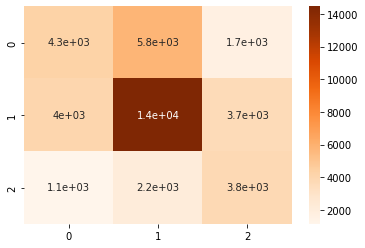

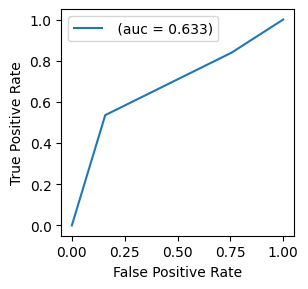

--- 2.1506845951080322 seconds ---
              precision    recall  f1-score   support

           0       0.45      0.36      0.40     11782
           1       0.65      0.65      0.65     22158
           2       0.41      0.54      0.47      7093

    accuracy                           0.55     41033
   macro avg       0.50      0.52      0.51     41033
weighted avg       0.55      0.55      0.55     41033



In [ ]:
import time
start_time = time.time()
print("Running built in multinomial NB on SWELL dataset: \n")
clf = MultinomialNB(alpha=1.0,fit_prior=True)
clf.fit(X_new, y)
y_pred = clf.predict(X_new_test)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

In [ ]:
# running on full data didn't finish after 2.5 hours
import time
start_time = time.time()
print("Running built in multinomial NB on SWELL dataset: \n")
clf = MultinomialNB()
clf.fit(X_trn, y)
y_pred = clf.predict(X_tst)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

Running built in multinomial NB on SWELL dataset: 



ValueError: ignored

In [ ]:
# running on PCA transformed data
import time
start_time = time.time()
print("Running built in multinomial NB on SWELL dataset with PCA (full data): \n")
clf = MultinomialNB()
clf.fit(X_trn, y)
y_pred = clf.predict(X_tst)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

Running built in multinomial NB on SWELL dataset with PCA (full data): 



ValueError: ignored

# KNN

using entire data: 32 features

Running built in KNN from on SWELL dataset: 

[[11733    44     5]
 [   46 22074    38]
 [    8    68  7017]]


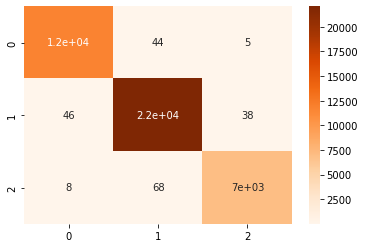

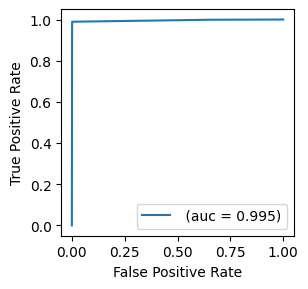

--- 735.2305042743683 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       0.99      1.00      1.00     22158
           2       0.99      0.99      0.99      7093

    accuracy                           0.99     41033
   macro avg       0.99      0.99      0.99     41033
weighted avg       0.99      0.99      0.99     41033



In [ ]:
import time
start_time = time.time()
print("Running built in KNN from on SWELL dataset: \n")
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(X,y) 
y_pred = knn.predict(X_test)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))   

KNN :: cross-validation

In [ ]:
neighbors = 5
for i in range(7):
  cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
  knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=neighbors))
  n_scores = cross_val_score(knn, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
  print("KNN: Cross validation with: "+ str(neighbors) +" "+ " neighbors\n")
  print(n_scores)
  print("Accuracy score mean: \t"+ str(n_scores.mean()))

  neighbors *= 2 

KNN: Cross validation with: 5  neighbors

[0.99689946 0.99656097 0.99700777 0.99647973 0.99660154 0.99688592
 0.99717025 0.99649327 0.99704839 0.99695357 0.99710255 0.99676406
 0.99658805 0.99660159 0.99703481]
Accuracy score mean: 	0.996812794452349
KNN: Cross validation with: 10  neighbors

[0.9909827  0.99063067 0.99140242 0.99014325 0.99040037 0.9909827
 0.99144304 0.99003493 0.99100978 0.99073886 0.99118579 0.990915
 0.99061713 0.99041404 0.99046807]
Accuracy score mean: 	0.9907579152854533
KNN: Cross validation with: 20  neighbors

[0.97877007 0.97813372 0.97841805 0.97797124 0.97774077 0.9784722
 0.97756506 0.97764629 0.97878361 0.97760537 0.97897316 0.97722657
 0.9781608  0.97810664 0.97847191]
Accuracy score mean: 	0.9781363642106509
KNN: Cross validation with: 40  neighbors

[0.95579355 0.95638929 0.95575293 0.95702564 0.95676781 0.95550922
 0.95544152 0.95668716 0.9575943  0.95610436 0.95716104 0.95485932
 0.95679547 0.95668716 0.95544092]
Accuracy score mean: 	0.95626731323

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KNN: Cross validation with: 160  neighbors

[0.88828563 0.89114246 0.88976143 0.89014054 0.88805394 0.88652549
 0.88874597 0.89027593 0.89179236 0.89040985 0.88875951 0.88953126
 0.88884075 0.89095291 0.89084312]
Accuracy score mean: 	0.8896040774701941


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


KNN: Cross validation with: 320  neighbors

[0.84512172 0.84436351 0.84397086 0.84701725 0.84354902 0.84283355
 0.84433643 0.84491863 0.84600179 0.84530918 0.84422811 0.84485093
 0.84628612 0.84420103 0.84478113]
Accuracy score mean: 	0.8447846170031952


KNN :: running on train/test dataset

Running built in KNN from on SWELL dataset: 

[[11688    84    10]
 [   70 22016    72]
 [   14    89  6990]]


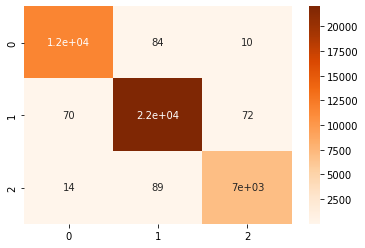

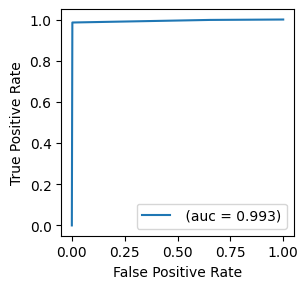

--- 5.99448561668396 seconds ---
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     11782
           1       0.99      0.99      0.99     22158
           2       0.99      0.99      0.99      7093

    accuracy                           0.99     41033
   macro avg       0.99      0.99      0.99     41033
weighted avg       0.99      0.99      0.99     41033



In [ ]:
# entire dataset on PCA transformed data
import time
start_time = time.time()
print("Running built in KNN from on SWELL dataset: \n")
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(X_trn,y) 
y_pred = knn.predict(X_tst)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))   

Running built in KNN from on SWELL dataset: 

[[11759    20     3]
 [   15 22134     9]
 [    4     7  7082]]


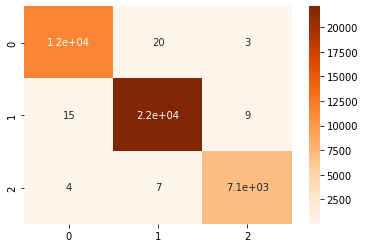

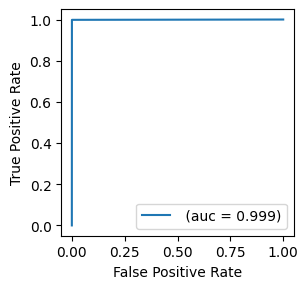

--- 6.756151437759399 seconds ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11782
           1       0.62      0.92      0.74     22158
           2       0.27      0.31      0.29      7093

    accuracy                           0.55     41033
   macro avg       0.30      0.41      0.34     41033
weighted avg       0.38      0.55      0.45     41033



In [ ]:
import time
start_time = time.time()
print("Running built in KNN from on SWELL dataset: \n")
knn = OneVsRestClassifier(KNeighborsClassifier(n_neighbors=5))
knn.fit(X_new,y) 
y_Pred = knn.predict(X_new_test)
y_tst = y_test
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_tst,y_Pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))   

In [ ]:
acc,f1,auc_

(0.9985865035459265, 0.9984817889972453, 0.9988300559157732)

# Random forest classifier

running with entire 32 features

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    0 22158     0]
 [    0     0  7093]]


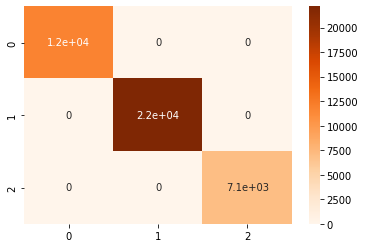

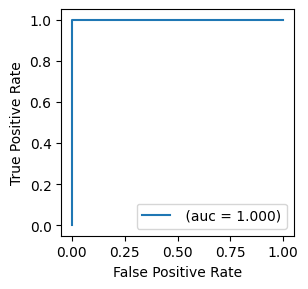

--- 602.796680688858 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial RF on SWELL dataset: \n")
model = RandomForestClassifier(n_estimators=200, criterion="gini",max_depth=30)
model.fit(X,y)
y_pred = model.predict(X_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

Random Forest:: cross validation

In [ ]:
n_estimators = [200, 400, 600, 800, 1000]
max_depth = [10, 20, 30, 40, 50, 60, 60, 80, 90, 100, None]
criteria_ = ["gini", "entropy"]

In [ ]:
random_grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'criterion' : criteria_}

In [ ]:
rf_model = RandomForestClassifier()
rf_rand_model = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 3, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_rand_model.fit(X_new,y)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      60, 80, 90, 100, None],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)

In [ ]:
rf_rand_model.return_train_score

False

In [ ]:
rf_rand_model.cv_results_

{'mean_fit_time': array([1028.59934982,  163.4935596 ,  650.79138303]),
 'mean_score_time': array([21.38514511,  5.58317947, 17.68063887]),
 'mean_test_score': array([0.99974004, 0.99975629, 0.89415606]),
 'param_criterion': masked_array(data=['entropy', 'gini', 'gini'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[50, 30, 10],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[800, 200, 1000],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'criterion': 'entropy', 'max_depth': 50, 'n_estimators': 800},
  {'criterion': 'gini', 'max_depth': 30, 'n_estimators': 200},
  {'criterion': 'gini', 'max_depth': 10, 'n_estimators': 1000}],
 'rank_test_score': array([2, 1, 3], dtype=int32),
 'split0_test_score': array([0.99974817, 0.99976441, 0.8953102 ]),
 'split1_test

In [ ]:
rf_rand_model.classes_

array([0, 1, 2])

In [ ]:
rf_rand_model.score

<bound method BaseSearchCV.score of RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=3,
                   n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      60, 80, 90, 100, None],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000]},
                   random_state=42, verbose=2)>

In [ ]:
rf_rand_model.best_params_

{'criterion': 'gini', 'max_depth': 30, 'n_estimators': 200}

In [ ]:
rf_rand_model.best_score_

0.9997617042625545

run with best parameters

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    4 22149     5]
 [    1     1  7091]]


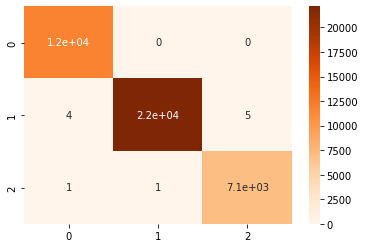

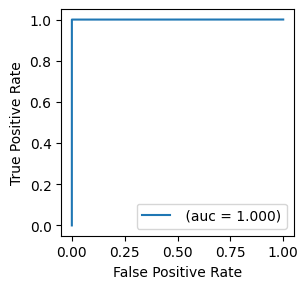

--- 125.45528316497803 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial RF on SWELL dataset: \n")
model = RandomForestClassifier(n_estimators=100, criterion="entropy",max_depth=20)
model.fit(X_new,y)
y_pred = model.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))


Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    2 22155     1]
 [    0     0  7093]]


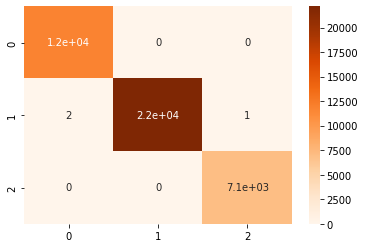

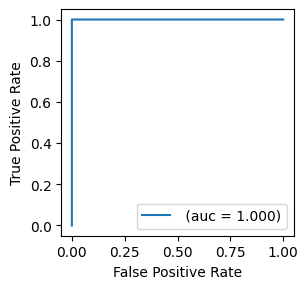

--- 193.00545811653137 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial RF on SWELL dataset: \n")
model = RandomForestClassifier(n_estimators=200, criterion="gini",max_depth=30)
model.fit(X_new,y)
y_pred = model.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))


Random Forest :: running on train/test dataset

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    2 22154     2]
 [    0     1  7092]]


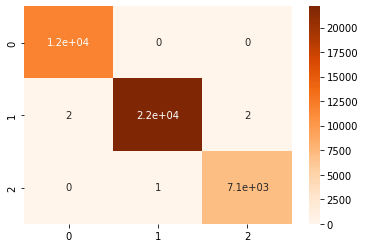

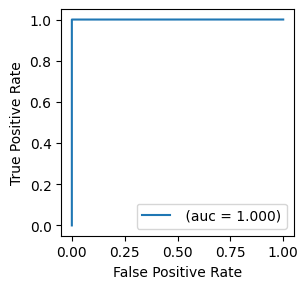

--- 671.7996017932892 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial RF on SWELL dataset: \n")
model = RandomForestClassifier(n_estimators=800, criterion="gini",max_depth=50)
model.fit(X_new,y)
y_pred = model.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    2 22154     2]
 [    1     0  7092]]


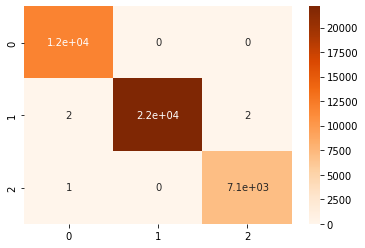

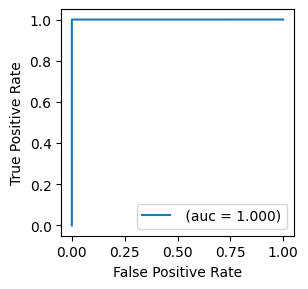

--- 934.0262265205383 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial RF on SWELL dataset: \n")
model = RandomForestClassifier(n_estimators=800, criterion="entropy",max_depth=50)
model.fit(X_new,y)
y_pred = model.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

running multinomial RF on PCA transformed data

Running multinomial RF on SWELL dataset: 

[[11780     2     0]
 [    1 22155     2]
 [    0     6  7087]]


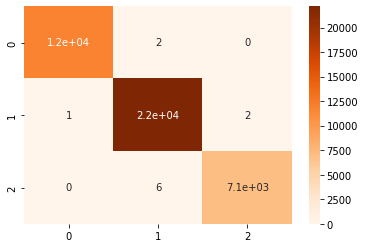

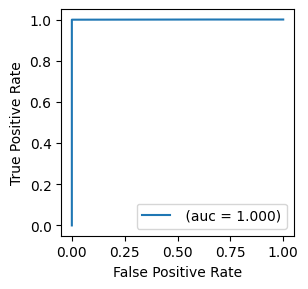

--- 1810.6789269447327 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial RF on SWELL dataset: \n")
model = RandomForestClassifier(n_estimators=800, criterion="entropy",max_depth=50)
model.fit(X_trn,y)
y_pred = model.predict(X_tst)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    2 22154     2]
 [    0     9  7084]]


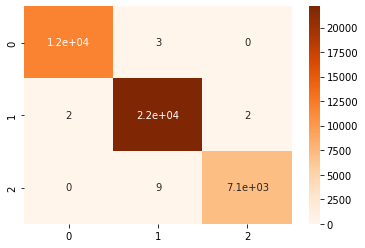

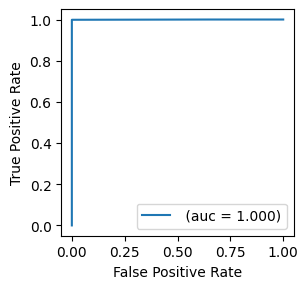

--- 297.862717628479 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial RF on SWELL dataset: \n")
model = RandomForestClassifier(n_estimators=200, criterion="gini",max_depth=30)
model.fit(X_trn,y)
y_pred = model.predict(X_tst)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))

test with different depth on 5 features

In [ ]:
depth = [10, 20, 30, 40, 50, 60, 60, 80, 90, 100, None]


Running multinomial RF on SWELL dataset: 

[[10053  1502   227]
 [  307 21557   294]
 [  143  1809  5141]]


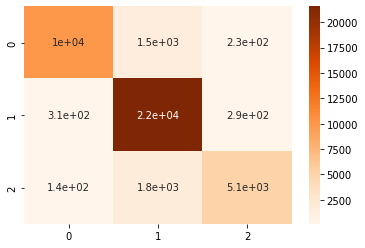

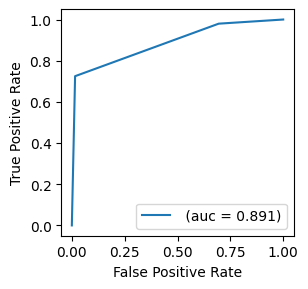

--- 157.9704625606537 seconds ---
              precision    recall  f1-score   support

           0       0.96      0.85      0.90     11782
           1       0.87      0.97      0.92     22158
           2       0.91      0.72      0.81      7093

    accuracy                           0.90     41033
   macro avg       0.91      0.85      0.88     41033
weighted avg       0.90      0.90      0.89     41033

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    3 22138    17]
 [    2     3  7088]]


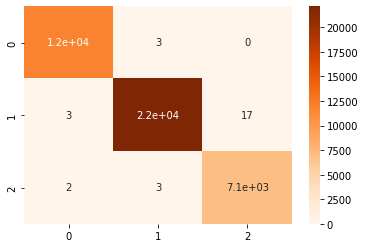

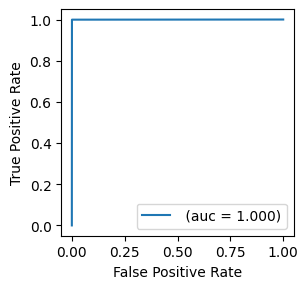

--- 184.05077409744263 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    2 22154     2]
 [    0     1  7092]]


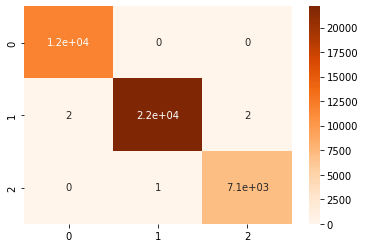

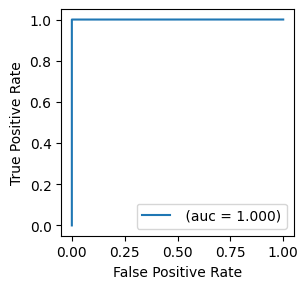

--- 184.24837374687195 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    1 22156     1]
 [    0     0  7093]]


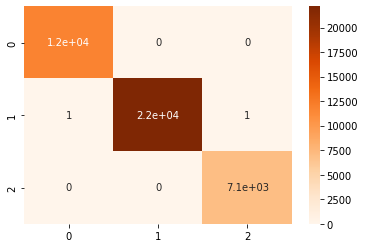

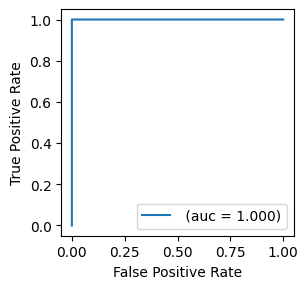

--- 182.29154062271118 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    2 22154     2]
 [    0     0  7093]]


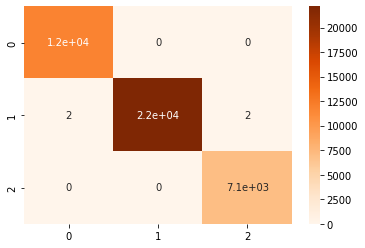

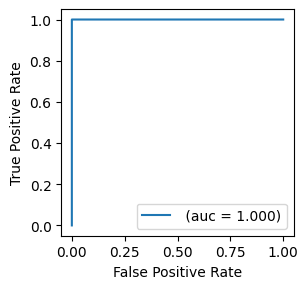

--- 181.58371591567993 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    2 22155     1]
 [    1     0  7092]]


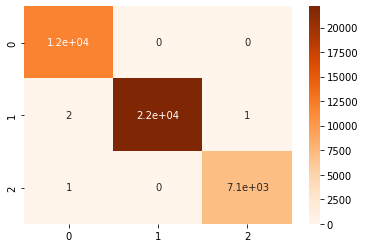

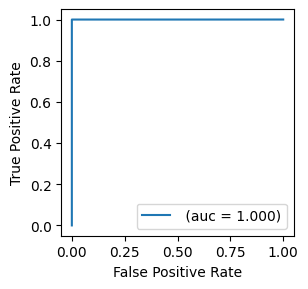

--- 180.18276643753052 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    2 22154     2]
 [    0     1  7092]]


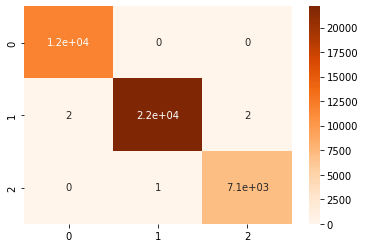

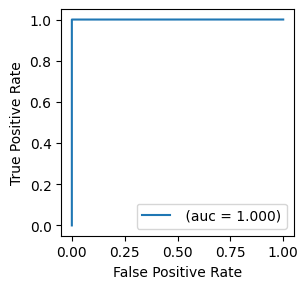

--- 177.07185769081116 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    2 22155     1]
 [    0     1  7092]]


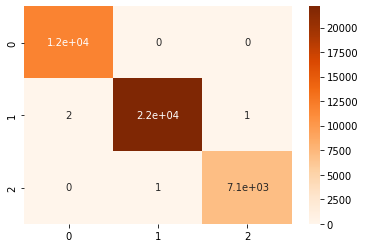

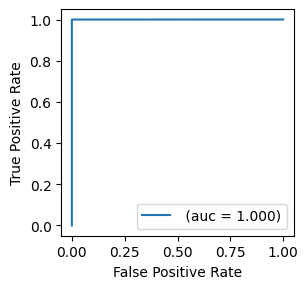

--- 181.9031708240509 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    1 22156     1]
 [    1     1  7091]]


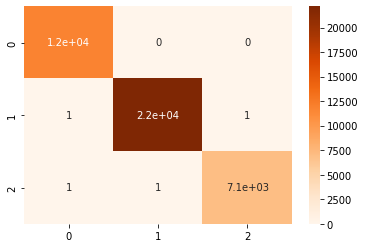

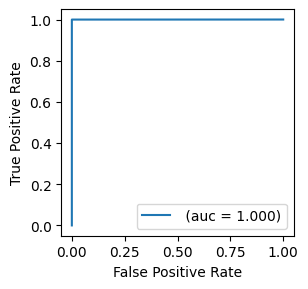

--- 184.19317817687988 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    1 22155     2]
 [    1     1  7091]]


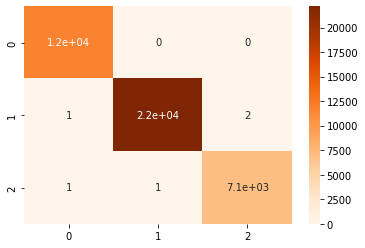

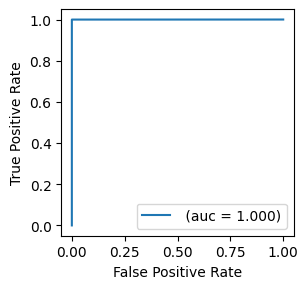

--- 177.17281651496887 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11782     0     0]
 [    2 22154     2]
 [    0     1  7092]]


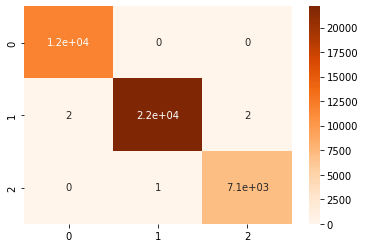

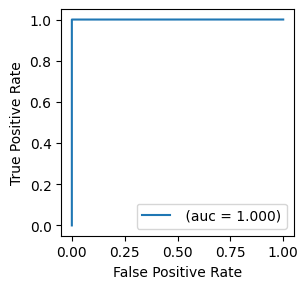

--- 187.71639609336853 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
for i in range(len(depth)):
  import time
  start_time = time.time()
  print("Running multinomial RF on SWELL dataset: \n")
  model = RandomForestClassifier(n_estimators=200, criterion="gini",max_depth=depth[i])
  model.fit(X_new,y)
  y_pred = model.predict(X_new_test)
  acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
  print("--- %s seconds ---" % (time.time() - start_time))
  print(classification_report(y_test,y_pred))

test on PCA transformed data

In [ ]:
depth = [10, 20, 30, 40, 50, 60, 60, 80, 90, 100, None]


Running multinomial RF on SWELL dataset: 

[[10191  1532    59]
 [  331 21617   210]
 [  152  1760  5181]]


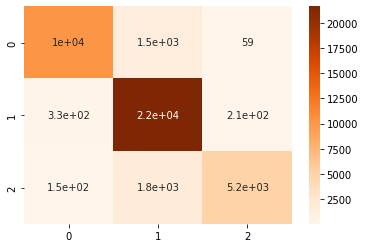

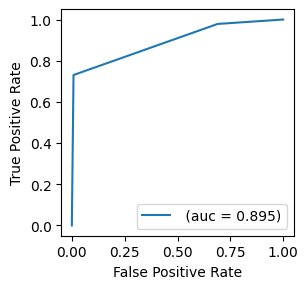

--- 247.33950996398926 seconds ---
              precision    recall  f1-score   support

           0       0.95      0.86      0.91     11782
           1       0.87      0.98      0.92     22158
           2       0.95      0.73      0.83      7093

    accuracy                           0.90     41033
   macro avg       0.92      0.86      0.88     41033
weighted avg       0.91      0.90      0.90     41033

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    3 22154     1]
 [    0    19  7074]]


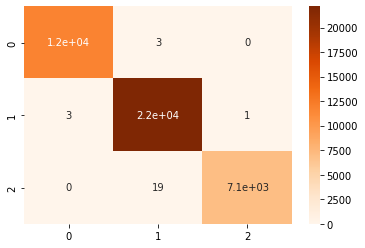

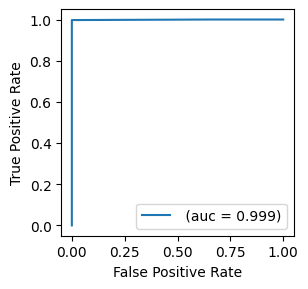

--- 335.8542606830597 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11780     2     0]
 [    2 22155     1]
 [    0     7  7086]]


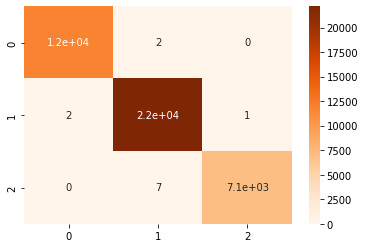

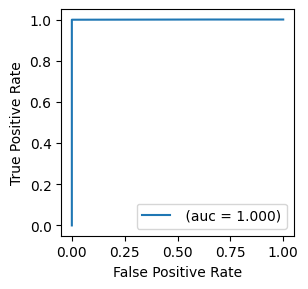

--- 319.41507267951965 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    2 22154     2]
 [    0     8  7085]]


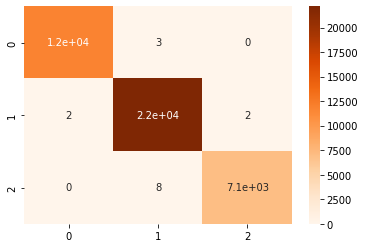

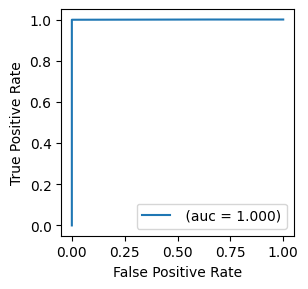

--- 337.6979787349701 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    2 22155     1]
 [    0     8  7085]]


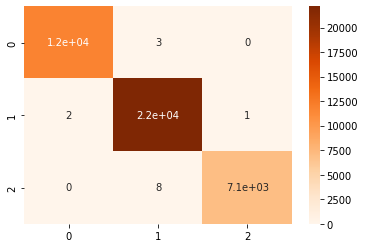

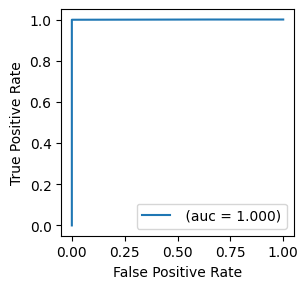

--- 311.78232622146606 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    2 22155     1]
 [    0     7  7086]]


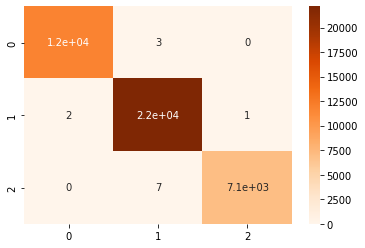

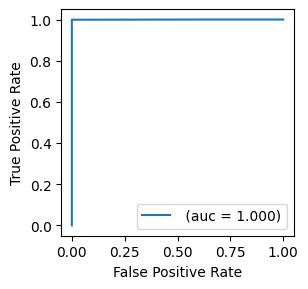

--- 297.1114227771759 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    2 22154     2]
 [    0     8  7085]]


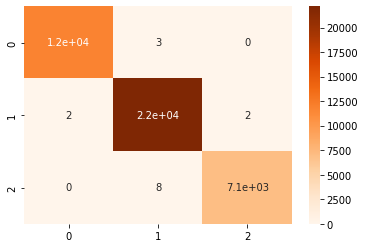

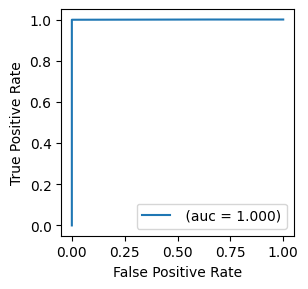

--- 303.75241136550903 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    2 22155     1]
 [    0     7  7086]]


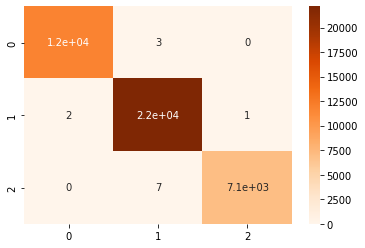

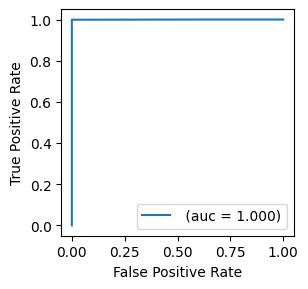

--- 322.220908164978 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    2 22155     1]
 [    0     8  7085]]


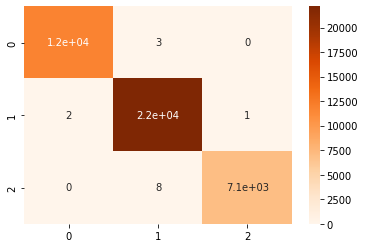

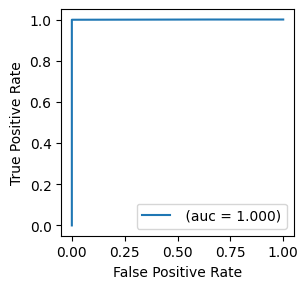

--- 318.73683071136475 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11778     4     0]
 [    2 22155     1]
 [    0     8  7085]]


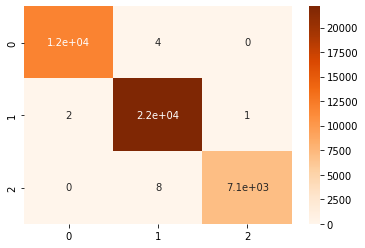

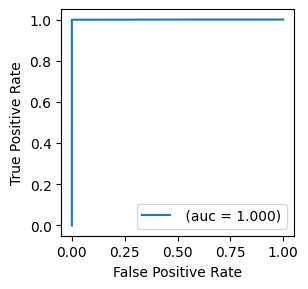

--- 290.8770740032196 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033

Running multinomial RF on SWELL dataset: 

[[11779     3     0]
 [    2 22155     1]
 [    0     8  7085]]


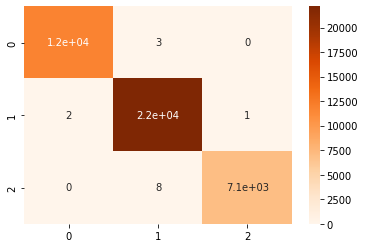

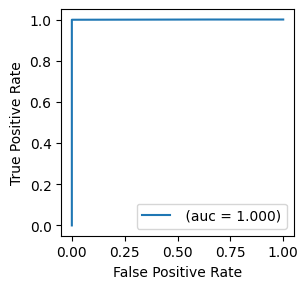

--- 290.6468937397003 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11782
           1       1.00      1.00      1.00     22158
           2       1.00      1.00      1.00      7093

    accuracy                           1.00     41033
   macro avg       1.00      1.00      1.00     41033
weighted avg       1.00      1.00      1.00     41033



In [ ]:
for i in range(len(depth)):
  import time
  start_time = time.time()
  print("Running multinomial RF on SWELL dataset: \n")
  model = RandomForestClassifier(n_estimators=200, criterion="gini",max_depth=depth[i])
  model.fit(X_trn,y)
  y_pred = model.predict(X_tst)
  acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
  print("--- %s seconds ---" % (time.time() - start_time))
  print(classification_report(y_test,y_pred))

test on entire dataset with 32 features

In [ ]:
depth = [10, 20, 30, 40, 50, 60, 60, 80, 90, 100, None]


Running multinomial RF on SWELL dataset: 

[[100950   4005    195]
 [   259 199589    234]
 [   309   4570  59178]]


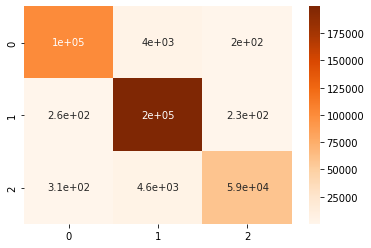

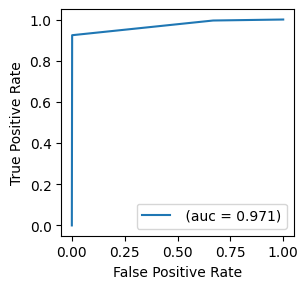

--- 485.7205502986908 seconds ---
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    105150
           1       0.96      1.00      0.98    200082
           2       0.99      0.92      0.96     64057

    accuracy                           0.97    369289
   macro avg       0.98      0.96      0.97    369289
weighted avg       0.97      0.97      0.97    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


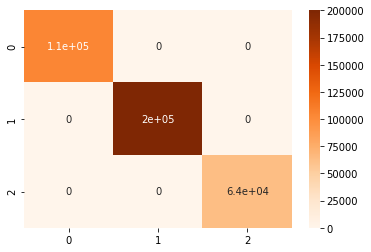

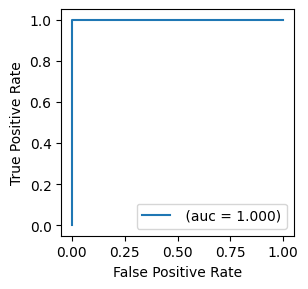

--- 575.6788649559021 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


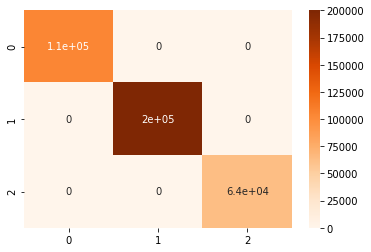

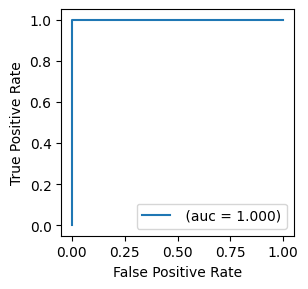

--- 595.5740287303925 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


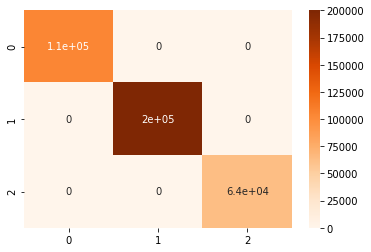

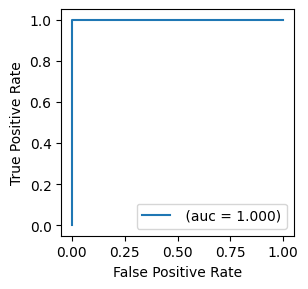

--- 622.3434975147247 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


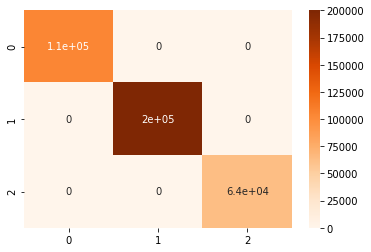

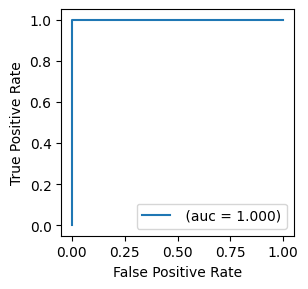

--- 605.6942131519318 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


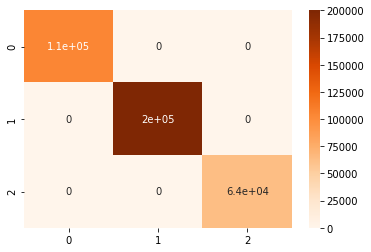

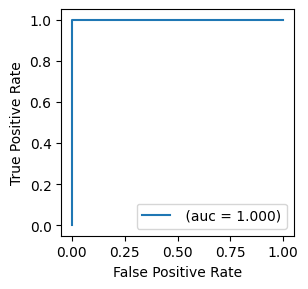

--- 581.1461019515991 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


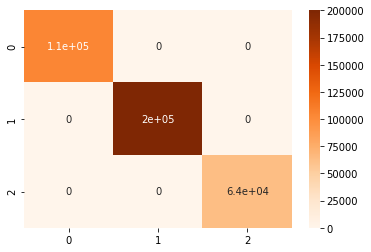

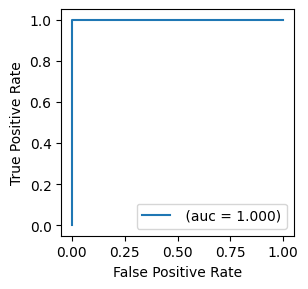

--- 585.9666829109192 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


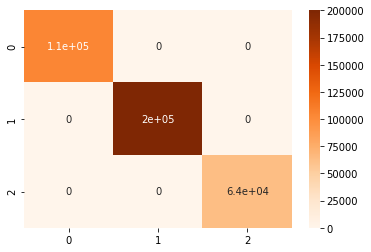

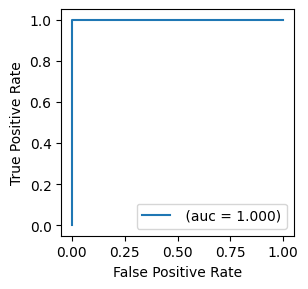

--- 628.0817847251892 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


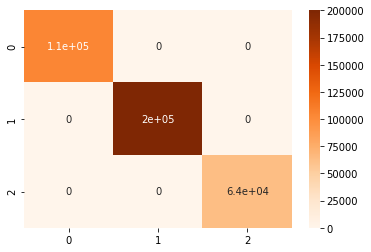

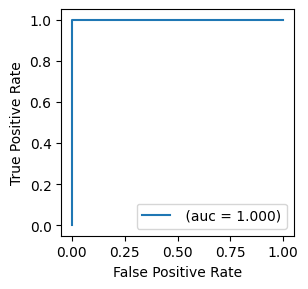

--- 576.9827761650085 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


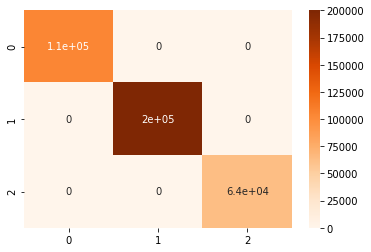

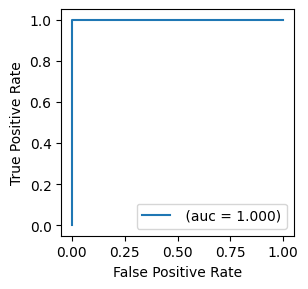

--- 577.9415984153748 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289

Running multinomial RF on SWELL dataset: 

[[105150      0      0]
 [     0 200082      0]
 [     0      0  64057]]


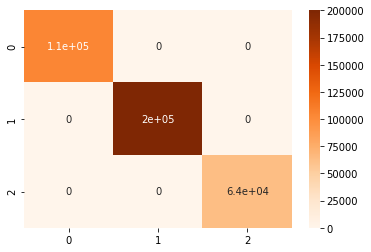

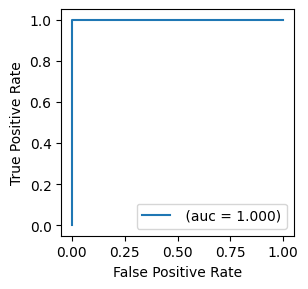

--- 569.3265733718872 seconds ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    105150
           1       1.00      1.00      1.00    200082
           2       1.00      1.00      1.00     64057

    accuracy                           1.00    369289
   macro avg       1.00      1.00      1.00    369289
weighted avg       1.00      1.00      1.00    369289



In [ ]:
for i in range(len(depth)):
  import time
  start_time = time.time()
  print("Running multinomial RF on SWELL dataset: \n")
  model = RandomForestClassifier(n_estimators=200, criterion="gini",max_depth=depth[i])
  model.fit(X,y)
  y_pred = model.predict(X)
  acc, f1, auc_ = calculate_accuracy_auc_f1score(y,y_pred)
  print("--- %s seconds ---" % (time.time() - start_time))
  print(classification_report(y,y_pred))

# SVM

cross validation: PCA transformed data

running with linear SVM

Running multinomial linear SVM on SWELL dataset: 

[[    0  7650  4132]
 [    0 20367  1791]
 [   82  4844  2167]]


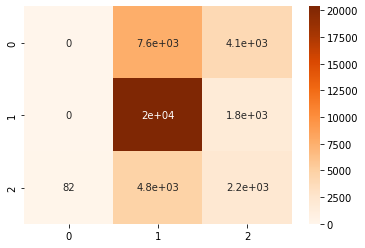

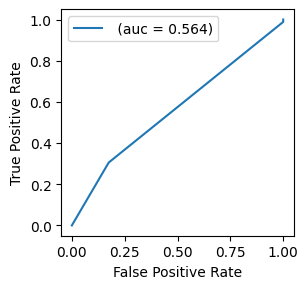

--- 2.1662635803222656 seconds ---
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     11782
           1       0.62      0.92      0.74     22158
           2       0.27      0.31      0.29      7093

    accuracy                           0.55     41033
   macro avg       0.30      0.41      0.34     41033
weighted avg       0.38      0.55      0.45     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial linear SVM on SWELL dataset: \n")
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e4))
clf.fit(X_new, y)
y_pred = clf.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)  
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))   

Linear SVM with PCA transformed data

Running multinomial linear SVM on SWELL dataset: 

[[ 2506  7079  2197]
 [ 1192 18949  2017]
 [ 1659  4992   442]]


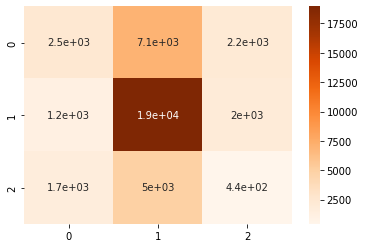

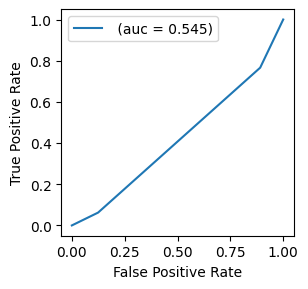

--- 1.2128572463989258 seconds ---
              precision    recall  f1-score   support

           0       0.47      0.21      0.29     11782
           1       0.61      0.86      0.71     22158
           2       0.09      0.06      0.08      7093

    accuracy                           0.53     41033
   macro avg       0.39      0.38      0.36     41033
weighted avg       0.48      0.53      0.48     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial linear SVM on SWELL dataset: \n")
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e4))
clf.fit(X_trn, y)
y_pred = clf.predict(X_tst) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)  
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))   

linear SVM on all 32 features

Running multinomial linear SVM on SWELL dataset: 

[[ 4716  5164  1902]
 [ 3333 16849  1976]
 [ 2465  2881  1747]]


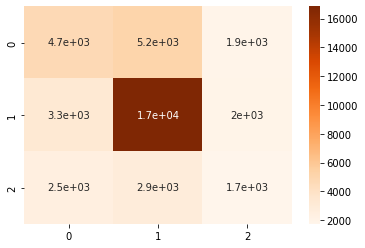

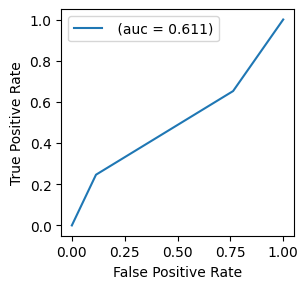

--- 3.691098690032959 seconds ---
              precision    recall  f1-score   support

           0       0.45      0.40      0.42     11782
           1       0.68      0.76      0.72     22158
           2       0.31      0.25      0.27      7093

    accuracy                           0.57     41033
   macro avg       0.48      0.47      0.47     41033
weighted avg       0.55      0.57      0.56     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial linear SVM on SWELL dataset: \n")
clf = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e4))
clf.fit(X, y)
y_pred = clf.predict(X_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)  
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))   

# all kernel experiments

polynomial kernel

In [ ]:
import time
start_time = time.time()
print("Running SVM on SWELL dataset: \n")
model_linear = SVC(kernel='poly',gamma=0.01,C=10)
model_linear.fit(X_new[0:500], y[0:500])
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))  

Running SVM on SWELL dataset: 



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='poly',gamma=0.01,C=10)
model_linear.fit(X_trn, y)
y_pred = model_linear.predict(X_tst) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)  
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))   

Running multinomial logistic regression on SWELL dataset: 



running on PCA transformed data

In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='poly',gamma=0.01,C=1000)
model_linear.fit(X_trn, y)
y_pred = model_linear.predict(X_tst) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)  
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred))   

Running multinomial logistic regression on SWELL dataset: 



linear kernel



Running multinomial logistic regression on SWELL dataset: 

[[ 3220  7559  1003]
 [ 2154 19319   685]
 [  431  5064  1598]]


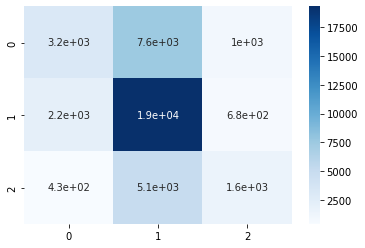

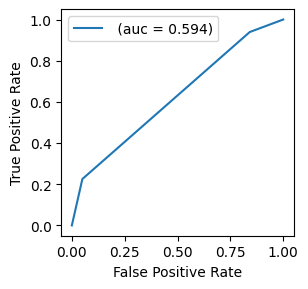

--- 286.138795375824 seconds ---


In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='linear',gamma=0.01,C=10) #c=10, 1, gamma=.001, .01
model_linear.fit(X_new[0:30000], y[0:30000])
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))  

In [ ]:
model_linear = SVC(kernel='linear',gamma=0.001,C=10)
model_linear.fit(X_new[0:10000], y[0:10000])   

SVC(C=10, gamma=0.001, kernel='linear')

In [ ]:
y_pred = model_linear.predict(X_new_test[0:10000])

[[ 777 1845  242]
 [ 549 4664  172]
 [ 106 1247  398]]


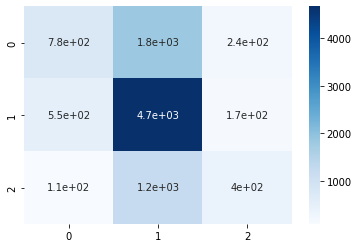

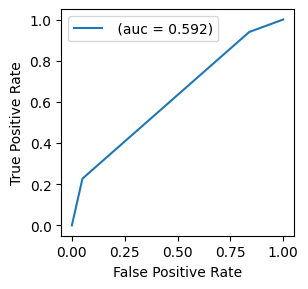

In [ ]:
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test[0:10000],y_pred)

running with PCA transformed data

In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='linear',gamma=0.01,C=100) #c=10, 1, gamma=.001, .01
model_linear.fit(X_trn, y)
y_pred = model_linear.predict(X_tst) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))  
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 



rbf kernel on PCA transformed data

In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.01,C=50) #c=10, 1, gamma=.001, .01
model_linear.fit(X_trn, y)
y_pred = model_linear.predict(X_tst) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))  
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 



running on 32 features

In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.01,C=50) #c=10, 1, gamma=.001, .01
model_linear.fit(X, y)
y_pred = model_linear.predict(X_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))  
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 



cross validation: PCA transformed data

In [ ]:
_C = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

In [ ]:
temp1 = [] 
for j in range(len(_C)):
  print("C: " + str(_C[j]) + "\n")
  clf_svm = svm.SVC(kernel='rbf', gamma=.01, C=_C[j], random_state=42)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(clf_svm, X_trn, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp1.append(n_scores)
  print("Average " + str(mean(temp1)) + "STD " +str(std(temp1)) + "\n")

C: 10



In [ ]:
temp1 = [] 
for j in range(len(_C)):
  print("C: " + str(_C[j]) + "\n")
  clf_svm = svm.SVC(kernel='rbf', gamma=.01, C=_C[j], random_state=42)
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(clf_svm, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp1.append(n_scores)
  print("Average " + str(mean(temp1)) + "STD " +str(std(temp1)) + "\n")

running on feature importance data

Running multinomial logistic regression on SWELL dataset: 

[[10999   716    67]
 [  622 21227   309]
 [  126   424  6543]]


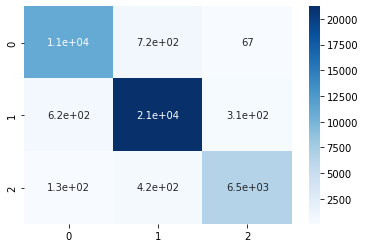

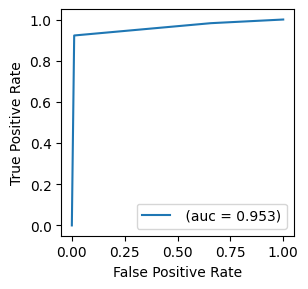

--- 4443.875926494598 seconds ---


In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.01,C=1) #c=10, 1, gamma=.001, .01
model_linear.fit(X_new, y)
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))  

Running multinomial logistic regression on SWELL dataset: 

[[11496   275    11]
 [  315 21707   136]
 [   50   249  6794]]


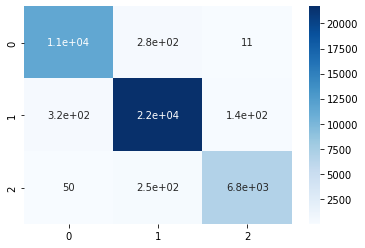

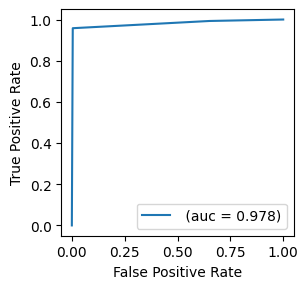

--- 4135.177974939346 seconds ---


In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.01,C=10)
model_linear.fit(X_new, y)
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))  

Running multinomial logistic regression on SWELL dataset: 

[[ 9716  1836   230]
 [  968 20708   482]
 [  281  1099  5713]]


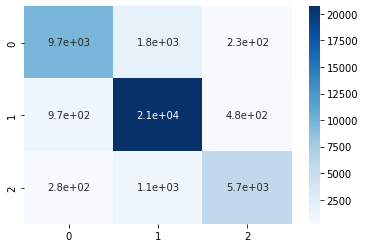

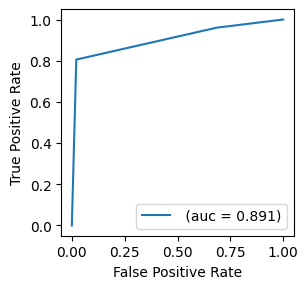

--- 6560.463921070099 seconds ---


In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.001,C=1)
model_linear.fit(X_new, y)
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))  

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85     11782
           1       0.88      0.93      0.90     22158
           2       0.89      0.81      0.85      7093

    accuracy                           0.88     41033
   macro avg       0.88      0.85      0.87     41033
weighted avg       0.88      0.88      0.88     41033



Running multinomial logistic regression on SWELL dataset: 

[[ 9089  2406   287]
 [ 1268 20322   568]
 [  543  1717  4833]]


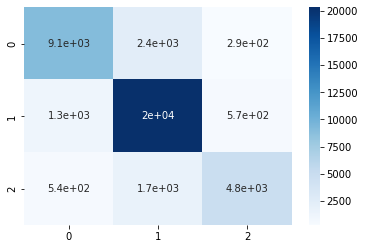

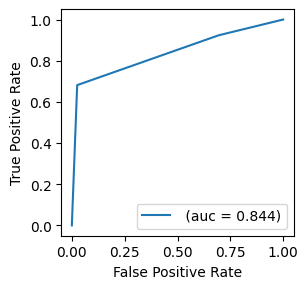

--- 7093.209369897842 seconds ---
              precision    recall  f1-score   support

           0       0.83      0.77      0.80     11782
           1       0.83      0.92      0.87     22158
           2       0.85      0.68      0.76      7093

    accuracy                           0.83     41033
   macro avg       0.84      0.79      0.81     41033
weighted avg       0.84      0.83      0.83     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.001,C=1)
model_linear.fit(X_new, y)
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time)) 
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 

[[11517   254    11]
 [  294 21738   126]
 [   49   233  6811]]


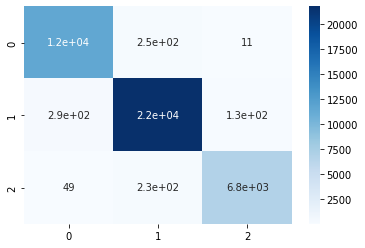

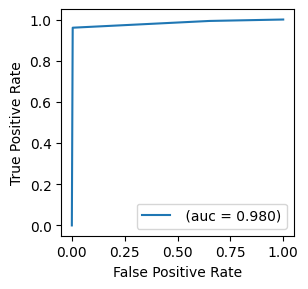

--- 4372.814309358597 seconds ---
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     11782
           1       0.98      0.98      0.98     22158
           2       0.98      0.96      0.97      7093

    accuracy                           0.98     41033
   macro avg       0.98      0.97      0.97     41033
weighted avg       0.98      0.98      0.98     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.01,C=12)
model_linear.fit(X_new, y)
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time)) 
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 

[[11465   304    13]
 [  345 21661   152]
 [   53   251  6789]]


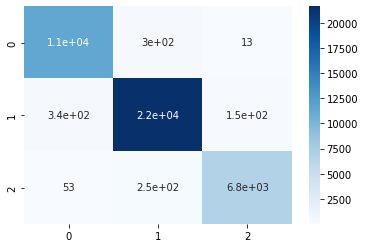

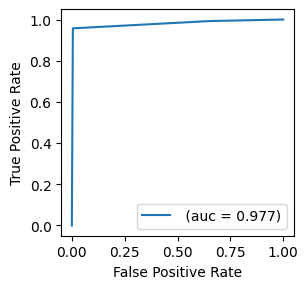

--- 4557.695093154907 seconds ---
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     11782
           1       0.98      0.98      0.98     22158
           2       0.98      0.96      0.97      7093

    accuracy                           0.97     41033
   macro avg       0.97      0.97      0.97     41033
weighted avg       0.97      0.97      0.97     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.01,C=8)
model_linear.fit(X_new, y)
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time)) 
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 

[[11372   386    24]
 [  431 21519   208]
 [   59   285  6749]]


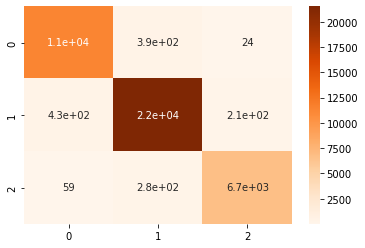

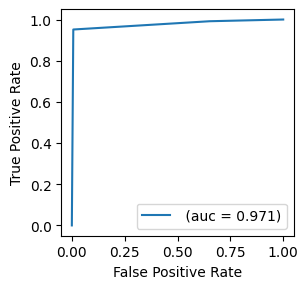

--- 3553.6942522525787 seconds ---
              precision    recall  f1-score   support

           0       0.96      0.97      0.96     11782
           1       0.97      0.97      0.97     22158
           2       0.97      0.95      0.96      7093

    accuracy                           0.97     41033
   macro avg       0.97      0.96      0.96     41033
weighted avg       0.97      0.97      0.97     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.01,C=4)
model_linear.fit(X_new, y)
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time)) 
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 

[[11578   197     7]
 [  251 21807   100]
 [   38   133  6922]]


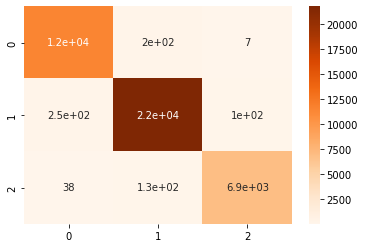

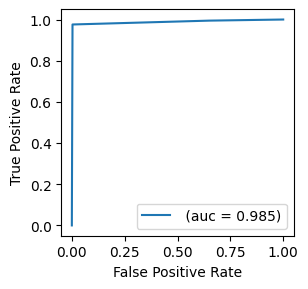

--- 3331.0103137493134 seconds ---
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11782
           1       0.99      0.98      0.98     22158
           2       0.98      0.98      0.98      7093

    accuracy                           0.98     41033
   macro avg       0.98      0.98      0.98     41033
weighted avg       0.98      0.98      0.98     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.01,C=20)
model_linear.fit(X_new, y)
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time)) 
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 

[[11628   152     2]
 [  198 21913    47]
 [   27    75  6991]]


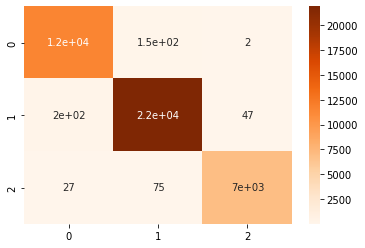

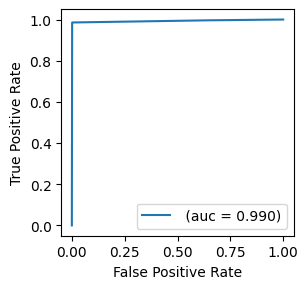

--- 3986.1886842250824 seconds ---
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     11782
           1       0.99      0.99      0.99     22158
           2       0.99      0.99      0.99      7093

    accuracy                           0.99     41033
   macro avg       0.99      0.99      0.99     41033
weighted avg       0.99      0.99      0.99     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
model_linear = SVC(kernel='rbf',gamma=0.01,C=50)
model_linear.fit(X_new, y)
y_pred = model_linear.predict(X_new_test) 
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time)) 
print(classification_report(y_test,y_pred)) 

# logistic regression: multi

running on all 32 features

Running multinomial logistic regression on SWELL dataset: 



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[[ 3579  7403   800]
 [ 1983 19797   378]
 [  513  4743  1837]]


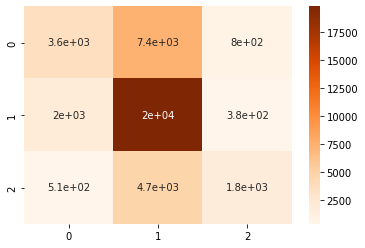

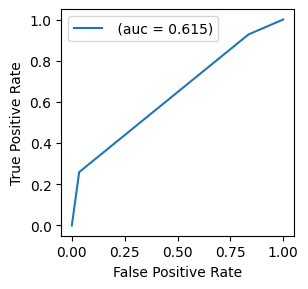

--- 237.51650667190552 seconds ---
              precision    recall  f1-score   support

           0       0.59      0.30      0.40     11782
           1       0.62      0.89      0.73     22158
           2       0.61      0.26      0.36      7093

    accuracy                           0.61     41033
   macro avg       0.61      0.49      0.50     41033
weighted avg       0.61      0.61      0.57     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000,penalty='l2',C=100)
logistic_reg_multi.fit(X, y)
y_pred = logistic_reg_multi.predict(X_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred)) 

In [ ]:
#C_ = [.001, .01, .05, 1, 10, 100, 1000, 10000]
C_ = [1, 10, 100, 1000, 10000]

penalty_ = ['l1','l2']

running on 'l2' regularization, with different C

In [ ]:
temp = []
#for i in range (2): 
for j in range(len(C_)):
  print("C: " + str(C_[j]) + "\n") 
  logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter=1000,penalty='l2',C=C_[j])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(logistic_reg_multi, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp.append(n_scores)
  print("Average " + str(mean(temp)) + "STD " +str(std(temp)) + "\n") 

C: 0.05

Average [0.59110726 0.58918465 0.58894094 0.59405887 0.59007826 0.59140513
 0.59362561 0.59181131 0.59189255 0.59255849 0.59210918 0.59045736
 0.58674754 0.58959084 0.58972623 0.59313818 0.59043029 0.59286739
 0.59803948 0.59196274 0.59308403 0.59048444 0.59202795 0.58988871
 0.59108018 0.58994286 0.59137805 0.59248829 0.59070108 0.59310009]STD 0.0019934083597393805

C: 0.01

Average [0.59108018 0.58918465 0.58895448 0.59405887 0.59007826 0.59143221
 0.59362561 0.59179777 0.59185193 0.59255849 0.59213626 0.59048444
 0.58674754 0.58961792 0.58971269 0.59309757 0.59044382 0.59289447
 0.59805302 0.59198982 0.59307049 0.59045736 0.59201441 0.58987517
 0.59108018 0.58992932 0.59136451 0.59248829 0.59074169 0.59311363]STD 0.0019936991099760355

C: 0.001

Average [0.59108921 0.58946447 0.58911244 0.59414913 0.59024073 0.5915315
 0.59364366 0.59191963 0.59200989 0.59250433 0.5922536  0.59058373
 0.58672949 0.58952765 0.58991578 0.59314721 0.5905386  0.59300279
 0.59823806 0.59221548 0

Running multinomial logistic regression on SWELL dataset: 



/usr/local/lib/python3.7/dist-packages/scipy/optimize/linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


[[ 3600  7404   778]
 [ 2234 19244   680]
 [  779  4897  1417]]


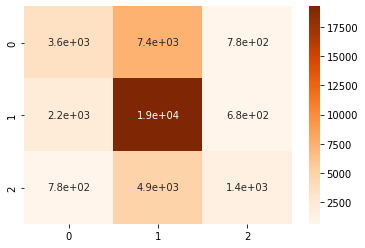

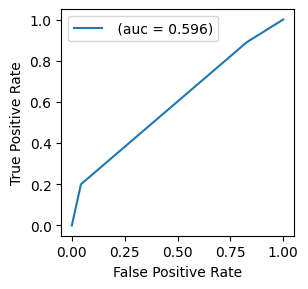

--- 115.14425110816956 seconds ---


In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter=1000,penalty='l2',C=1000)
logistic_reg_multi.fit(X_new, y)
y_pred = logistic_reg_multi.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
temp2 = []
for j in range(len(C_)):
  print("C: " + str(C_[j]) + "\n") 
  logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000,penalty='l2',C=C_[j])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(logistic_reg_multi, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp2.append(n_scores)
  print("Average " + str(mean(temp2)) + "\t" +"STD " +str(std(temp2)) + "\n") 

C: 0.05

Average [0.59162176 0.59094479 0.58994286 0.59549406 0.59178423 0.59265076
 0.59649598 0.59284032 0.59154052 0.59364168 0.58571854 0.592732
 0.58747868 0.59089063 0.5915676  0.59476292 0.59219042 0.59411303
 0.59939343 0.58595104 0.59460045 0.59164884 0.59338189 0.59164884
 0.59256953 0.58964499 0.59308403 0.59438382 0.5910531  0.59532062]	STD 0.002816901472539381

C: 0.01

Average [0.5916353  0.59171654 0.58636844 0.59606271 0.591703   0.59281324
 0.59629289 0.59290801 0.59237997 0.59377708 0.58936067 0.59278616
 0.58787132 0.59086355 0.59158114 0.59480354 0.58908988 0.59384224
 0.59956944 0.58920061 0.59159468 0.58852122 0.59335482 0.59155406
 0.59191963 0.59052506 0.59323296 0.59454629 0.59144575 0.59529354]	STD 0.003083832954827839

C: 0.001

Average [0.5918745  0.5915676  0.58742452 0.59563848 0.59182034 0.59284934
 0.59613493 0.5929396  0.59262368 0.59383124 0.59052957 0.59277713
 0.58783973 0.59066497 0.59165787 0.59506079 0.59031294 0.59374295
 0.5995559  0.59053654 0.

train/test with optimal parameters

Running multinomial logistic regression on SWELL dataset: 

[[ 3626  7430   726]
 [ 2232 19348   578]
 [  751  4954  1388]]


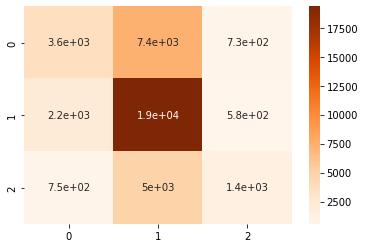

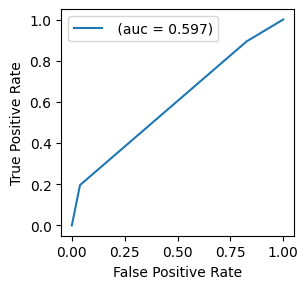

--- 112.05955767631531 seconds ---
              precision    recall  f1-score   support

           0       0.55      0.31      0.39     11782
           1       0.61      0.87      0.72     22158
           2       0.52      0.20      0.28      7093

    accuracy                           0.59     41033
   macro avg       0.56      0.46      0.47     41033
weighted avg       0.58      0.59      0.55     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000,penalty='l2',C=10)
logistic_reg_multi.fit(X_new, y)
y_pred = logistic_reg_multi.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 

[[ 3628  7432   722]
 [ 2256 19325   577]
 [  755  4947  1391]]


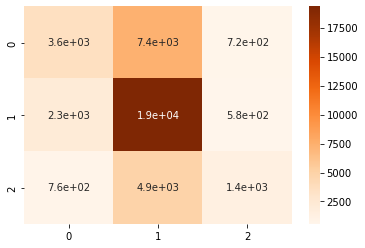

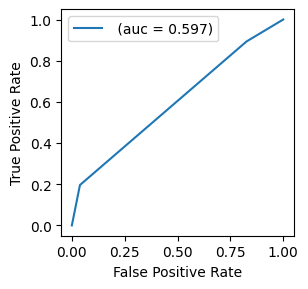

--- 92.38105702400208 seconds ---
              precision    recall  f1-score   support

           0       0.55      0.31      0.39     11782
           1       0.61      0.87      0.72     22158
           2       0.52      0.20      0.28      7093

    accuracy                           0.59     41033
   macro avg       0.56      0.46      0.47     41033
weighted avg       0.58      0.59      0.55     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000,penalty='l2',C=1000)
logistic_reg_multi.fit(X_new, y)
y_pred = logistic_reg_multi.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred)) 

Running multinomial logistic regression on SWELL dataset: 

[[ 3625  7432   725]
 [ 2246 19335   577]
 [  754  4952  1387]]


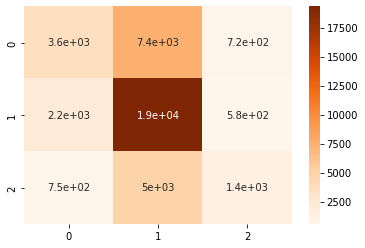

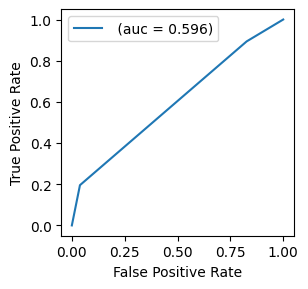

--- 119.53235363960266 seconds ---
              precision    recall  f1-score   support

           0       0.55      0.31      0.39     11782
           1       0.61      0.87      0.72     22158
           2       0.52      0.20      0.28      7093

    accuracy                           0.59     41033
   macro avg       0.56      0.46      0.47     41033
weighted avg       0.58      0.59      0.55     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000,penalty='l2',C=10000)
logistic_reg_multi.fit(X_new, y)
y_pred = logistic_reg_multi.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred)) 

running on 'l1' regularization, with different C, and solver = saga, lbgfs cannot add penalty l2

In [ ]:
temp3 = []
for j in range(len(C_)):
  print("C: " + str(C_[j]) + "\n") 
  logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='saga',max_iter=1000,penalty='l1',C=C_[j])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(logistic_reg_multi, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp3.append(n_scores)
  print("Average " + str(mean(temp3)) + "\t" +"STD " +str(std(temp3)) + "\n")
  print(classification_report(y_test,y_pred))  

C: 1

Average [0.59213626 0.59097186 0.5895096  0.59511495 0.59205502 0.59300279
 0.59592732 0.59289447 0.59300279 0.59396664 0.59316526 0.59262368
 0.5878307  0.59029489 0.59151344 0.59503371 0.59270492 0.59362561
 0.59931219 0.59288345 0.59462753 0.59164884 0.59343605 0.59167592
 0.59267784 0.59135097 0.59321942 0.59473584 0.59072815 0.59523938]	STD 0.0021211067960094417

              precision    recall  f1-score   support

           0       0.55      0.31      0.39     11782
           1       0.61      0.87      0.72     22158
           2       0.52      0.20      0.28      7093

    accuracy                           0.59     41033
   macro avg       0.56      0.46      0.47     41033
weighted avg       0.58      0.59      0.55     41033

C: 10

Average [0.59213626 0.59097186 0.5895096  0.59511495 0.59205502 0.59300279
 0.59592732 0.59289447 0.59300279 0.59396664 0.59316526 0.59262368
 0.5878307  0.59029489 0.59151344 0.59503371 0.59270492 0.59362561
 0.59929865 0.59286991 0.5

In [ ]:
temp3 = []
for j in range(len(C_)):
  print("C: " + str(C_[j]) + "\n") 
  logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='saga',max_iter=1000,penalty='l2',C=C_[j])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(logistic_reg_multi, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp3.append(n_scores)
  print("Average " + str(mean(temp3)) + "\t" +"STD " +str(std(temp3)) + "\n")
  print(classification_report(y_test,y_pred))  

C: 1

Average [0.59213626 0.59097186 0.5895096  0.59511495 0.59205502 0.59300279
 0.59592732 0.59289447 0.59300279 0.59396664 0.59316526 0.59262368
 0.5878307  0.59029489 0.59151344 0.59503371 0.59270492 0.59362561
 0.59928511 0.59288345 0.59462753 0.59164884 0.59343605 0.59167592
 0.59267784 0.59135097 0.59321942 0.59473584 0.59072815 0.59523938]	STD 0.0021183806335893607

              precision    recall  f1-score   support

           0       0.55      0.31      0.39     11782
           1       0.61      0.87      0.72     22158
           2       0.52      0.20      0.28      7093

    accuracy                           0.59     41033
   macro avg       0.56      0.46      0.47     41033
weighted avg       0.58      0.59      0.55     41033

C: 10

Average [0.59213626 0.59097186 0.5895096  0.59511495 0.59205502 0.59300279
 0.59592732 0.59289447 0.59300279 0.59396664 0.59316526 0.59262368
 0.5878307  0.59029489 0.59151344 0.59503371 0.59270492 0.59362561
 0.59928511 0.59286991 0.5

train/test with optimal parameters

Running multinomial logistic regression on SWELL dataset: 

[[ 3628  7430   724]
 [ 2232 19349   577]
 [  751  4957  1385]]


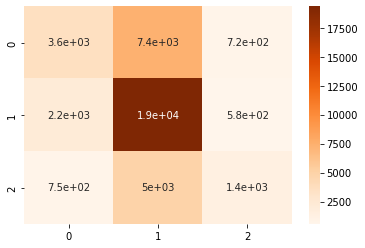

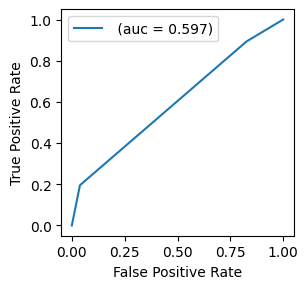

--- 61.780160427093506 seconds ---


In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='saga',max_iter=1000,penalty='l2',C=1000)
logistic_reg_multi.fit(X_new, y)
y_pred = logistic_reg_multi.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))

running on No regularization, with different C

In [ ]:
temp4 = []
for j in range(len(C_)):
  print("C: " + str(C_[j]) + "\n") 
  logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000,penalty='none',C=C_[j])
  cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  n_scores = cross_val_score(logistic_reg_multi, X_new, y, scoring='accuracy', cv=cv, n_jobs=-1)
  temp4.append(n_scores)
  print("Average " + str(mean(temp4)) + "\t" +"STD " +str(std(temp4)) + "\n") 

train/test with optimal parameters

In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000,penalty='none',C=C_[j])
logistic_reg_multi.fit(X_new, y)
y_pred = logistic_reg_multi.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
n_scores

array([0.5861518 , 0.59075523, 0.5893742 , 0.59533158, 0.59151344,
       0.59292155, 0.58923881, 0.59210918, 0.59278616, 0.58757582,
       0.59300279, 0.59289447, 0.58755991, 0.59037613, 0.59154052,
       0.5878307 , 0.59246121, 0.58785778, 0.59963714, 0.59307301,
       0.59527742, 0.59173008, 0.59338189, 0.59154052, 0.59216334,
       0.59154052, 0.59311111, 0.59446505, 0.59043029, 0.59523938])

In [ ]:
from pprint import pprint
pprint(logistic_reg_multi.get_params())

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'multinomial',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset: \n")
logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='newton-cg',max_iter=1000,penalty='l2',C=C_[j])
logistic_reg_multi.fit(X_new, y)
y_pred = logistic_reg_multi.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))

In [ ]:
logistic_reg_multi.fit(X_new, y)


LogisticRegression(max_iter=1000, multi_class='multinomial')

[[ 3628  7430   724]
 [ 2233 19348   577]
 [  750  4955  1388]]


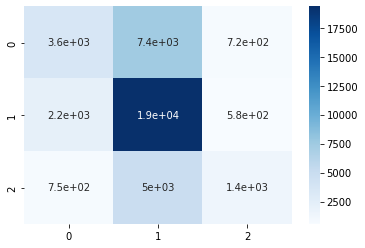

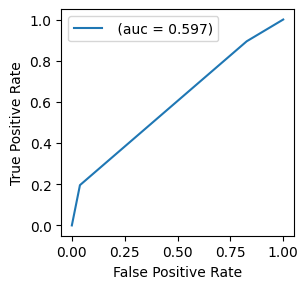

In [ ]:
y_pred = logistic_reg_multi.predict(X_new_test)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)


running with PCA transformed data

Running multinomial logistic regression on SWELL dataset with PCA: 

[[ 1800  9238   744]
 [ 1204 20606   348]
 [  210  6277   606]]


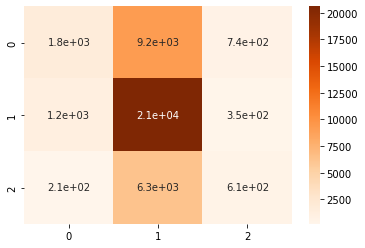

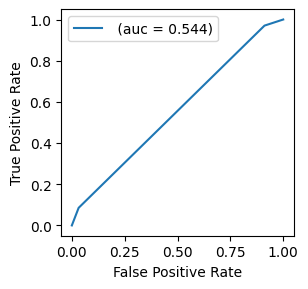

--- 8.881443738937378 seconds ---
              precision    recall  f1-score   support

           0       0.56      0.15      0.24     11782
           1       0.57      0.93      0.71     22158
           2       0.36      0.09      0.14      7093

    accuracy                           0.56     41033
   macro avg       0.50      0.39      0.36     41033
weighted avg       0.53      0.56      0.47     41033



In [ ]:
import time
start_time = time.time()
print("Running multinomial logistic regression on SWELL dataset with PCA: \n")
logistic_reg_multi = LogisticRegression(multi_class='multinomial', solver='lbfgs',max_iter=1000,penalty='l2',C=10)
logistic_reg_multi.fit(X_trn, y)
y_pred = logistic_reg_multi.predict(X_tst)
acc, f1, auc_ = calculate_accuracy_auc_f1score(y_test,y_pred)
print("--- %s seconds ---" % (time.time() - start_time))
print(classification_report(y_test,y_pred)) 

# heatmap

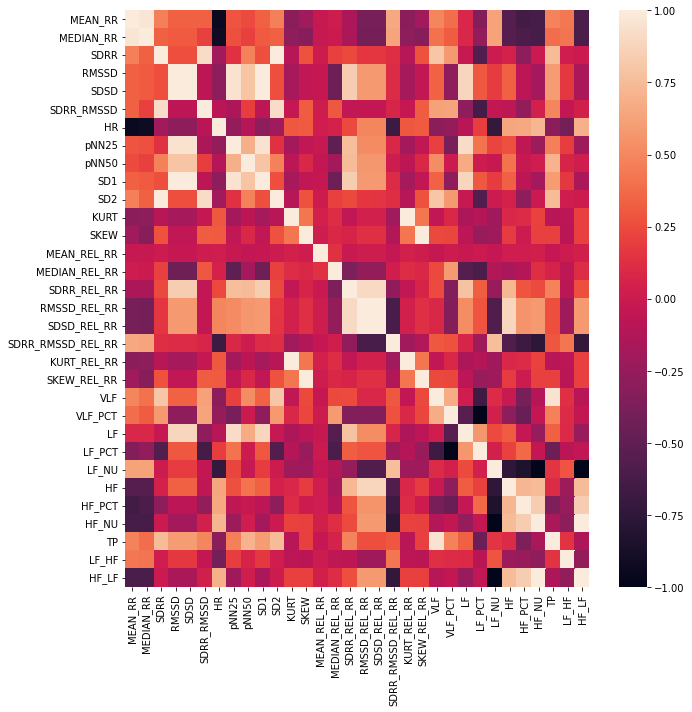

In [ ]:
plt.figure(figsize=(10,10))

import seaborn as sns
df=df_train.drop(['condition'],axis=1) # you can remove 'KURT' if you want
corr=df.corr()
sns.heatmap(corr)
plt.tight_layout()
plt.show()

# DNN with pytorch

In [ ]:
class FFNNetModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FFNNetModel, self).__init__()
        
        # Linear function 1: 
        self.fc1 = nn.Linear(input_dim, hidden_dim) 
        # Non-linearity 1
        self.relu1 = nn.ReLU()
        #self.sig = nn.Sigmoid()

        # Linear function 2: 
        self.fc2 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        self.relu2 = nn.ReLU()

        # Linear function 3: 
        #self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        #self.relu3 = nn.ReLU()

         # Linear function 4: 
        #self.fc4 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        #self.relu4 = nn.ReLU()

        # Linear function 5: 
        #self.fc3 = nn.Linear(hidden_dim, hidden_dim)
        # Non-linearity 2
        #self.relu3 = nn.ReLU()

        self.fc3 = nn.Linear(hidden_dim, output_dim)  

    def forward(self, x):
        
        # input to first hidden layer
        out = self.fc1(x)
        out = self.relu1(out)

        # input to second hidden layer
        out = self.fc2(out)
        out = self.relu2(out)

        # input to third hidden layer
        #out = self.fc3(out)
        #out = self.relu3(out)

        # input to fourth hidden layer
        #out = self.fc4(out)
        #out = self.relu4(out)

         # input to fifth hidden layer
        #out = self.fc3(out)
        #out = self.relu3(out)

        # input to third hidden layer and output
        out = self.fc3(out)
        return F.softmax(out, dim=1)

    #def predict(self, x):
      #Y_pred = self.forward(x)
      #return Y_pred

In [ ]:
# dataset definition
class TrainValDataset():
    # load the dataset
    def __init__(self):

        # for 32, top 5 features
        #df_trn = pd.read_csv('train.csv')
        #df_trn = df_trn.drop(['sampen','higuci','datasetId'],axis=1)
        #df_trn = df_trn[['MEAN_RR', 'MEDIAN_RR','HR', 'pNN25','pNN50','condition']].copy()
        #self.X = df_trn.values[:, :-1]
        #self.y = df_trn.values[:, -1]
        #self.X = self.X.astype('float32')
        #self.y = LabelEncoder().fit_transform(self.y)

        # for PCA
        self.X = X_trn
        self.y = y
        self.X = self.X.astype('float32')

    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

    # get indexes for train and validation rows
    def get_splits(self, n_test=0.33):
        val_size = round(n_test * len(self.X))
        train_size = len(self.X) - val_size
        return random_split(self, [train_size, val_size])

In [ ]:
# dataset definition
class TestDataset():
    # load the dataset
    def __init__(self):
        # for top 5, 32 features
        #df_tst = pd.read_csv('test.csv')
        #df_tst = df_tst.drop(['sampen','higuci','datasetId'],axis=1)
        #df_tst = df_tst[['MEAN_RR', 'MEDIAN_RR','HR', 'pNN25','pNN50','condition']].copy()
        #self.X = df_tst.values[:, :-1]
        #self.y = df_tst.values[:, -1]
        #self.X = self.X.astype('float32')
        #self.y = LabelEncoder().fit_transform(self.y)
        
        # for PCA
        self.X = X_tst
        self.X = self.X.astype('float32')
        self.y = y
       
    # number of rows in the dataset
    def __len__(self):
        return len(self.X)

    # get a row at an index
    def __getitem__(self, idx):
        return [self.X[idx], self.y[idx]]

In [ ]:

input_dim = 5
hidden_dim = 512
output_dim = 3
ff_nn_model = FFNNetModel(input_dim, hidden_dim, output_dim)  
dataset = TrainValDataset()
train, validation = dataset.get_splits()
train_dl = DataLoader(train, batch_size=32, shuffle=True)
val_dl = DataLoader(validation, batch_size=1024, shuffle=False)
test_data = TestDataset()
test_dl = DataLoader(test_data, batch_size=1024, shuffle=False)

In [ ]:
len(train)

247424

In [ ]:
train[0:3]

[array([[9.4234784e+02, 9.2949164e+02, 6.4806839e+01, 1.3466666e+01,
         1.0666667e+00],
        [8.3527393e+02, 8.2375714e+02, 7.2385094e+01, 3.0666666e+00,
         1.3333334e-01],
        [7.2455499e+02, 7.1766699e+02, 8.3778954e+01, 2.9733334e+01,
         1.8000000e+00]], dtype=float32), array([1, 1, 0])]

In [ ]:
len(validation)

121865

In [ ]:
def train_validate_test(epoch_, bs_train, bs_val, bs_test, learning_rate, hidden_):
  input_dim = 10 #features: 32, 5 ;; components for PCA 5, 10
  hidden_dim = hidden_
  output_dim = 3
  ff_nn_model = FFNNetModel(input_dim, hidden_dim, output_dim) #***
  criterion = nn.CrossEntropyLoss()
  optimizer = SGD(ff_nn_model.parameters(), lr=learning_rate, momentum=0.9)
  
  dataset = TrainValDataset()
  train, validation = dataset.get_splits()
  train_dl = DataLoader(train, batch_size=bs_train)
  val_dl = DataLoader(validation, batch_size=bs_val)
  test_data = TestDataset()
  test_dl = DataLoader(test_data, batch_size=bs_test)
  print("Epoch: " +str(epoch_)+ "\t"+ "Batch training size: " + str(bs_train) +"\t" +"Learning rate: "+ str(learning_rate)+"\n")
  # train
  running_loss = 0.0
  train_loss = []
  correct = 0  
  total = 0          
  acc_ = []                                       
  for epoch in range(epoch_):      
      for i, data in enumerate(train_dl, 0):
        #print(data)
        inputs, labels = data
        optimizer.zero_grad()
        outputs = ff_nn_model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # measure correctness
        _, predicted = torch.max(outputs.data, 1)         
        total += labels.size(0)                           
        correct += (predicted == labels).sum().item()
        # print statistics
        running_loss = running_loss + loss.item()
        if i % 1500 == 1499:     # print every 1500 mini-batches
          print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 1500:.3f}')
          running_loss = 0.0
          matrix = confusion_matrix(labels, predicted)
          np.seterr(divide='ignore')
          print("Mean per class Training Accuracy" + str(matrix.diagonal()/matrix.sum(axis=1)))
      acc_.append(100 * correct / total)
      train_loss.append(running_loss / bs_train)
  print('Mean Training Accuracy:'+ str(statistics.mean(acc_)))
  print("End of Training \n")
  
  # validate
  # ff_nn_model = FFNNetModel(input_dim, hidden_dim, output_dim)
  #optimizer = SGD(ff_nn_model_.parameters(), lr=learning_rate, momentum=0.9)
  correct_ = 0
  total_ = 0
  running_loss_val = 0
  val_loss = []
  with torch.no_grad():
    for data in val_dl:
      images, labels = data
      # calculate output 
      outputs = ff_nn_model(images)
      loss = criterion(outputs, labels)
      _, predicted_ = torch.max(outputs.data, 1)
      total_ += labels.size(0)
      correct_ += (predicted_ == labels).sum().item()
      running_loss_val += loss.item()
      val_loss.append(running_loss_val / bs_val)
      matrix_ = confusion_matrix(labels, predicted_)
      np.seterr(divide='ignore')
      print("Mean per class Validation Accuracy" + str(matrix_.diagonal()/matrix_.sum(axis=1)))
  print(f'Mean Validation Accuracy on validate data: {100 * correct_ // total_} %')
  print("End of validation \n")
  
  # test
  #ff_nn_model = FFNNetModel(input_dim, hidden_dim, output_dim)
  #optimizer = SGD(_ff_nn_model.parameters(), lr=learning_rate, momentum=0.9)
  _correct = 0
  _total = 0
  with torch.no_grad():
    for data in test_dl:
        images, labels = data
        # calculate output
        outputs = ff_nn_model(images)
        _, _predicted = torch.max(outputs.data, 1)
        _total += labels.size(0)
        _correct += (_predicted == labels).sum().item()
        _matrix = confusion_matrix(labels, _predicted)
        np.seterr(divide='ignore')
        print("Mean per class Test Accuracy" + str(_matrix.diagonal()/_matrix.sum(axis=1)))
  print(f'Mean Testing Accuracy on the test data: {100 * _correct // _total} %')
  print("End of testing \n")
  
  plt.plot(train_loss,'g*',val_loss, 'ro')
  plt.show()

In [ ]:
hidden_dim = 32 #512
# parameters to tune
Epoch = [10, 20, 40, 60, 80, 100]
batch_train = [10, 20, 32, 64, 128, 512]
LR = [.005, .05, .1, .01, .001, .0001]
#run on entire train/validation split and test dataset
batch_test = 41000
batch_val = 10000

Running DNN on SWELL dataset: 

Epoch: 20	Batch training size: 20	Learning rate: 0.01

[1,  1500] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[1,  3000] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[1,  4500] loss: 1.269
Mean per class Training Accuracy[1. 0. 0.]
[1,  6000] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[1,  7500] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[1,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[1, 10500] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[1, 12000] loss: 1.264
Mean per class Training Accuracy[1. 0.]
[2,  1500] loss: 1.578
Mean per class Training Accuracy[1. 0. 0.]
[2,  3000] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[2,  4500] loss: 1.269
Mean per class Training Accuracy[1. 0. 0.]
[2,  6000] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[2,  7500] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[2,  9000] loss: 1.265
Mean per class Training Accuracy[1.

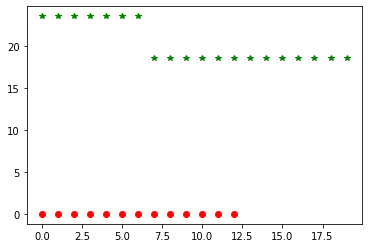

--- 222.7993574142456 seconds ---


In [ ]:
# run a single time with fixed/best/optimal parameter 
import time
start_time = time.time()
print("Running DNN on SWELL dataset: \n")
train_validate_test(Epoch[1], batch_train[1], batch_val, batch_test,LR[3], hidden_dim) #picking a good learning rate
print("--- %s seconds ---" % (time.time() - start_time))

Running DNN on SWELL dataset: 

Epoch: 10	Batch training size: 10	Learning rate: 0.005

[1,  1500] loss: 1.023
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.179
Mean per class Training Accuracy[1. 0. 0.]
[1,  4500] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[1,  6000] loss: 1.262
Mean per class Training Accuracy[1. 0. 0.]
[1,  7500] loss: 1.272
Mean per class Training Accuracy[1. 0. 0.]
[1,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[1, 10500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[1, 12000] loss: 1.261
Mean per class Training Accuracy[1. 0.]
[1, 13500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[1, 15000] loss: 1.264
Mean per class Training Accuracy[1. 0.]
[1, 16500] loss: 1.274
Mean per class Training Accuracy[1. 0.]
[1, 18000] loss: 1.263
Mean per class Training Accuracy[1. 0. 0.]
[1, 19500] loss: 1.273
Mean per class Training Accuracy[1. 0. 0.]
[1, 21000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0

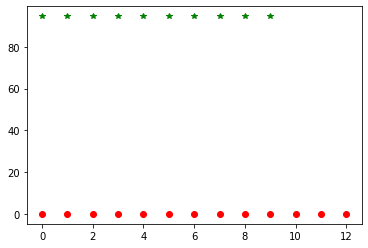

--- 188.37262606620789 seconds ---
Epoch: 10	Batch training size: 20	Learning rate: 0.05

[1,  1500] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1.]
[1,  4500] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[1,  7500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1,  9000] loss: 1.015
Mean per class Training Accuracy[0. 1. 0.]
[1, 10500] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1, 12000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.258
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1.]
[2,  4500] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[2,  6000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[2,  7500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[2,  9000] loss: 1.015
Mean per class Training Accuracy[0.

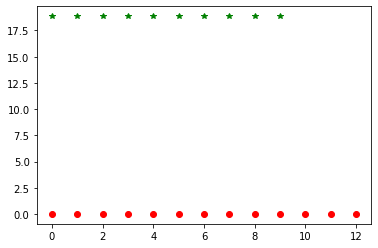

--- 291.12109541893005 seconds ---
Epoch: 10	Batch training size: 32	Learning rate: 0.1

[1,  1500] loss: 1.243
Mean per class Training Accuracy[1. 0. 0.]
[1,  3000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[1,  4500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[1,  6000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[1,  7500] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[2,  1500] loss: 1.463
Mean per class Training Accuracy[1. 0. 0.]
[2,  3000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[2,  4500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[2,  6000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[2,  7500] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[3,  1500] loss: 1.463
Mean per class Training Accuracy[1. 0. 0.]
[3,  3000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[3,  4500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[3,  6000] loss: 1.268
Mean per class Training Accura

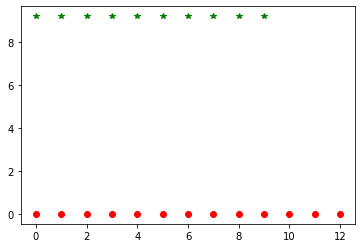

--- 361.3620617389679 seconds ---
Epoch: 10	Batch training size: 64	Learning rate: 0.01

[1,  1500] loss: 1.037
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[3,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[4,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[4,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[5,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[5,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[6,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[6,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[7,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[7,  3000] loss: 1.009
Mean per class Training Accura

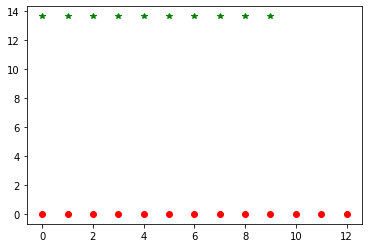

--- 400.91010212898254 seconds ---
Epoch: 10	Batch training size: 128	Learning rate: 0.001

[1,  1500] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[4,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[5,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[6,  1500] loss: 1.301
Mean per class Training Accuracy[0.         0.98550725 0.        ]
[7,  1500] loss: 1.301
Mean per class Training Accuracy[0.         0.98550725 0.        ]
[8,  1500] loss: 1.301
Mean per class Training Accuracy[0.         0.98550725 0.        ]
[9,  1500] loss: 1.288
Mean per class Training Accuracy[0.13157895 0.92753623 0.        ]
[10,  1500] loss: 1.237
Mean per class Training Accuracy[0.15789474 0.94202899 0.        ]
Mean Training Accuracy:54.23632518999581
End of Training 

Mean per class Validation Accuracy[0.26445137 0.96442468 0.        ]

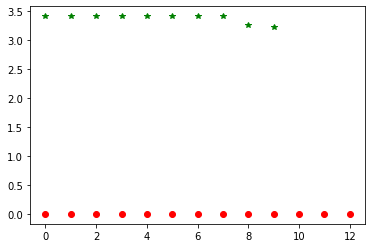

--- 429.0381107330322 seconds ---
Epoch: 10	Batch training size: 512	Learning rate: 0.0001

Mean Training Accuracy:53.59167236987699
End of Training 

Mean per class Validation Accuracy[0.10898593 0.98192771 0.06339235]
Mean per class Validation Accuracy[0.11137848 0.98030838 0.05679157]
Mean per class Validation Accuracy[0.10358012 0.98126251 0.0504305 ]
Mean per class Validation Accuracy[0.10626514 0.9812136  0.04977629]
Mean per class Validation Accuracy[0.11535789 0.98377097 0.05128205]
Mean per class Validation Accuracy[0.10409315 0.98143335 0.05393258]
Mean per class Validation Accuracy[0.11236351 0.98091886 0.04707884]
Mean per class Validation Accuracy[0.12055749 0.98       0.06242775]
Mean per class Validation Accuracy[0.10519079 0.98052562 0.07214206]
Mean per class Validation Accuracy[0.11134602 0.98341014 0.05757052]
Mean per class Validation Accuracy[0.10185185 0.97873887 0.06098283]
Mean per class Validation Accuracy[0.12119089 0.97860863 0.05652911]
Mean per class Valida

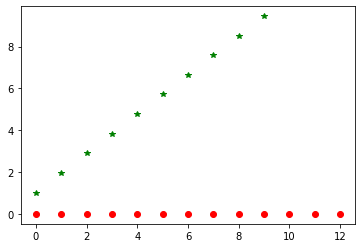

--- 449.2118990421295 seconds ---
Epoch: 20	Batch training size: 10	Learning rate: 0.005

[1,  1500] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[1,  4500] loss: 1.005
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.007
Mean per class Training Accuracy[0. 1.]
[1,  7500] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[1,  9000] loss: 1.017
Mean per class Training Accuracy[0. 1.]
[1, 10500] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[1, 12000] loss: 1.017
Mean per class Training Accuracy[0. 1. 0.]
[1, 13500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1, 15000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[1, 16500] loss: 1.015
Mean per class Training Accuracy[0. 1. 0.]
[1, 18000] loss: 1.015
Mean per class Training Accuracy[0. 1. 0.]
[1, 19500] loss: 1.002
Mean per class Training Accuracy[0. 1. 0.]
[1, 21000] loss: 1.011
Mean per class Training Accuracy[0.

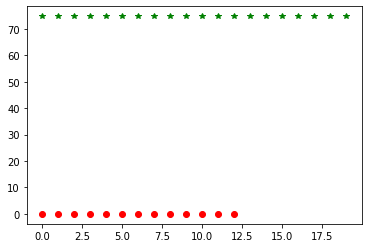

--- 818.9002435207367 seconds ---
Epoch: 20	Batch training size: 20	Learning rate: 0.05

[1,  1500] loss: 1.270
Mean per class Training Accuracy[1. 0. 0.]
[1,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[1,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[1,  6000] loss: 1.265
Mean per class Training Accuracy[1. 0.]
[1,  7500] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[1,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[1, 10500] loss: 1.269
Mean per class Training Accuracy[1. 0. 0.]
[1, 12000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[2,  1500] loss: 1.583
Mean per class Training Accuracy[1. 0. 0.]
[2,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[2,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[2,  6000] loss: 1.265
Mean per class Training Accuracy[1. 0.]
[2,  7500] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[2,  9000] loss: 1.265
Mean per class Training Accuracy[1. 

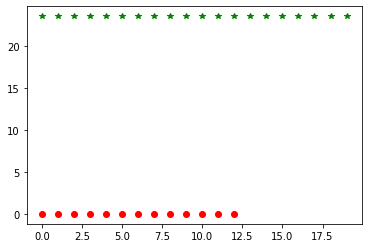

--- 1018.0094232559204 seconds ---
Epoch: 20	Batch training size: 32	Learning rate: 0.1

[1,  1500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[1,  3000] loss: 1.270
Mean per class Training Accuracy[1. 0. 0.]
[1,  4500] loss: 1.195
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[1,  7500] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.166
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[2,  4500] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[2,  6000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[2,  7500] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.166
Mean per class Training Accuracy[0. 1. 0.]
[3,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[3,  4500] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[3,  6000] loss: 1.010
Mean per class Training Accura

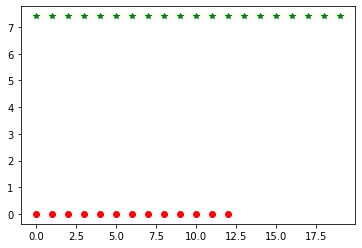

--- 1150.6897785663605 seconds ---
Epoch: 20	Batch training size: 64	Learning rate: 0.01

[1,  1500] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.593
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.593
Mean per class Training Accuracy[0. 1. 0.]
[3,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[4,  1500] loss: 1.593
Mean per class Training Accuracy[0. 1. 0.]
[4,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[5,  1500] loss: 1.593
Mean per class Training Accuracy[0. 1. 0.]
[5,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[6,  1500] loss: 1.593
Mean per class Training Accuracy[0. 1. 0.]
[6,  3000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[7,  1500] loss: 1.593
Mean per class Training Accuracy[0. 1. 0.]
[7,  3000] loss: 1.009
Mean per class Training Accur

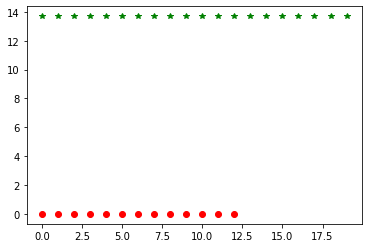

--- 1229.329312324524 seconds ---
Epoch: 20	Batch training size: 128	Learning rate: 0.001

[1,  1500] loss: 0.969
Mean per class Training Accuracy[0.4516129  0.90540541 0.        ]
[2,  1500] loss: 1.224
Mean per class Training Accuracy[0.48387097 0.86486486 0.        ]
[3,  1500] loss: 1.217
Mean per class Training Accuracy[0.48387097 0.82432432 0.04347826]
[4,  1500] loss: 1.206
Mean per class Training Accuracy[0.4516129  0.87837838 0.08695652]
[5,  1500] loss: 1.198
Mean per class Training Accuracy[0.41935484 0.89189189 0.26086957]
[6,  1500] loss: 1.188
Mean per class Training Accuracy[0.48387097 0.89189189 0.30434783]
[7,  1500] loss: 1.169
Mean per class Training Accuracy[0.48387097 0.90540541 0.47826087]
[8,  1500] loss: 1.151
Mean per class Training Accuracy[0.48387097 0.89189189 0.30434783]
[9,  1500] loss: 1.131
Mean per class Training Accuracy[0.51612903 0.89189189 0.52173913]
[10,  1500] loss: 1.111
Mean per class Training Accuracy[0.58064516 0.90540541 0.52173913]
[11,  15

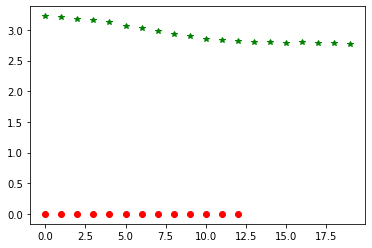

--- 1283.2822351455688 seconds ---
Epoch: 20	Batch training size: 512	Learning rate: 0.0001

Mean Training Accuracy:55.67155801073879
End of Training 

Mean per class Validation Accuracy[0.24947953 0.98132051 0.0075979 ]
Mean per class Validation Accuracy[0.24846416 0.97986451 0.00284738]
Mean per class Validation Accuracy[0.26487455 0.97968313 0.00542005]
Mean per class Validation Accuracy[0.25088715 0.97892229 0.00405562]
Mean per class Validation Accuracy[0.2633251  0.98306956 0.00634737]
Mean per class Validation Accuracy[0.25027125 0.98334858 0.00282486]
Mean per class Validation Accuracy[0.25749559 0.9785124  0.00290698]
Mean per class Validation Accuracy[0.24388539 0.98067722 0.00352113]
Mean per class Validation Accuracy[0.25571429 0.97717651 0.00622524]
Mean per class Validation Accuracy[0.24876674 0.98049936 0.00358209]
Mean per class Validation Accuracy[0.25017373 0.97942921 0.00347625]
Mean per class Validation Accuracy[0.25774648 0.98177178 0.0041816 ]
Mean per class Valid

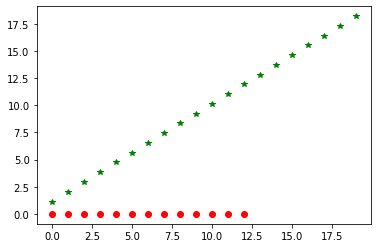

--- 1321.5647234916687 seconds ---
Epoch: 40	Batch training size: 10	Learning rate: 0.005

[1,  1500] loss: 1.015
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1,  4500] loss: 1.008
Mean per class Training Accuracy[0. 1.]
[1,  6000] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[1,  7500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1,  9000] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1, 10500] loss: 1.012
Mean per class Training Accuracy[1. 0.]
[1, 12000] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[1, 13500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1, 15000] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[1, 16500] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[1, 18000] loss: 1.005
Mean per class Training Accuracy[0. 1.]
[1, 19500] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[1, 21000] loss: 1.006
Mean per class Training Accuracy[0. 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[11, 12000] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[11, 13500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[11, 15000] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[11, 16500] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[11, 18000] loss: 1.005
Mean per class Training Accuracy[0. 1.]
[11, 19500] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[11, 21000] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[11, 22500] loss: 1.019
Mean per class Training Accuracy[0. 1. 0.]
[11, 24000] loss: 1.014
Mean per class Training Accuracy[0. 1. 0.]
[12,  1500] loss: 1.515
Mean per class Training Accuracy[0. 1. 0.]
[12,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[12,  4500] loss: 1.008
Mean per class Training Accuracy[0. 1.]
[12,  6000] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[12,  7500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[12,  9000] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[17, 12000] loss: 1.037
Mean per class Training Accuracy[0.4  0.75 0.  ]
[17, 13500] loss: 1.045
Mean per class Training Accuracy[0.66666667 0.75       0.        ]
[17, 15000] loss: 1.042
Mean per class Training Accuracy[0.  0.8 0. ]
[17, 16500] loss: 1.044
Mean per class Training Accuracy[0.5 0.5 0. ]
[17, 18000] loss: 1.040
Mean per class Training Accuracy[0.         0.83333333]
[17, 19500] loss: 1.046
Mean per class Training Accuracy[0.5        0.66666667 0.        ]
[17, 21000] loss: 1.045
Mean per class Training Accuracy[0.66666667 1.         0.        ]
[17, 22500] loss: 1.048
Mean per class Training Accuracy[1.         0.42857143 0.        ]
[17, 24000] loss: 1.048
Mean per class Training Accuracy[0.   0.75 0.  ]
[18,  1500] loss: 1.570
Mean per class Training Accuracy[0.5        0.66666667 0.        ]
[18,  3000] loss: 1.060
Mean per class Training Accuracy[0.   0.25 0.  ]
[18,  4500] loss: 1.046
Mean per class Training Accuracy[0.4 1. ]
[18,  6000] loss: 1.051
Mean per class T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[18, 12000] loss: 1.039
Mean per class Training Accuracy[0.4  0.75 0.  ]
[18, 13500] loss: 1.046
Mean per class Training Accuracy[0.66666667 0.75       0.        ]
[18, 15000] loss: 1.043
Mean per class Training Accuracy[0.  0.8 0. ]
[18, 16500] loss: 1.047
Mean per class Training Accuracy[0.5 0.5 0. ]
[18, 18000] loss: 1.044
Mean per class Training Accuracy[0.         0.83333333]
[18, 19500] loss: 1.050
Mean per class Training Accuracy[0.5        0.66666667 0.        ]
[18, 21000] loss: 1.047
Mean per class Training Accuracy[0.66666667 1.         0.        ]
[18, 22500] loss: 1.049
Mean per class Training Accuracy[1.         0.42857143 0.        ]
[18, 24000] loss: 1.046
Mean per class Training Accuracy[0.   0.75 0.  ]
[19,  1500] loss: 1.551
Mean per class Training Accuracy[0.83333333 0.66666667 0.        ]
[19,  3000] loss: 1.039
Mean per class Training Accuracy[0.   0.25 0.  ]
[19,  4500] loss: 1.036
Mean per class Training Accuracy[0.4 1. ]
[19,  6000] loss: 1.040
Mean per class T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[19, 12000] loss: 1.030
Mean per class Training Accuracy[0.6 0.5 0. ]
[19, 13500] loss: 1.037
Mean per class Training Accuracy[1.   0.75 0.  ]
[19, 15000] loss: 1.037
Mean per class Training Accuracy[0.33333333 0.8        0.        ]
[19, 16500] loss: 1.053
Mean per class Training Accuracy[1. 0. 0.]
[19, 18000] loss: 1.081
Mean per class Training Accuracy[0.         0.83333333]
[19, 19500] loss: 1.024
Mean per class Training Accuracy[0.5        0.83333333 0.        ]
[19, 21000] loss: 1.019
Mean per class Training Accuracy[0.66666667 1.         0.        ]
[19, 22500] loss: 1.020
Mean per class Training Accuracy[1.         0.57142857 0.        ]
[19, 24000] loss: 1.020
Mean per class Training Accuracy[0.   0.75 0.  ]
[20,  1500] loss: 1.529
Mean per class Training Accuracy[0.5        0.66666667 0.        ]
[20,  3000] loss: 1.027
Mean per class Training Accuracy[0.  0.5 0. ]
[20,  4500] loss: 0.986
Mean per class Training Accuracy[0.4 1. ]
[20,  6000] loss: 0.966
Mean per class Trainin

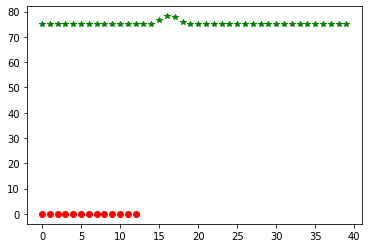

--- 2061.2280225753784 seconds ---
Epoch: 40	Batch training size: 20	Learning rate: 0.05

[1,  1500] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[1,  4500] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.013
Mean per class Training Accuracy[0. 1. 0.]
[1,  7500] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[1,  9000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[1, 10500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1, 12000] loss: 1.014
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.261
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[2,  4500] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[2,  6000] loss: 1.013
Mean per class Training Accuracy[0. 1. 0.]
[2,  7500] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[2,  9000] loss: 1.007
Mean per class Training Accur

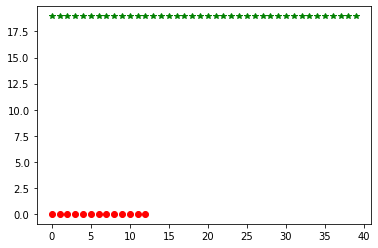

--- 2454.8141667842865 seconds ---
Epoch: 40	Batch training size: 32	Learning rate: 0.1

[1,  1500] loss: 1.377
Mean per class Training Accuracy[0. 0. 1.]
[1,  3000] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[1,  4500] loss: 1.379
Mean per class Training Accuracy[0. 0. 1.]
[1,  6000] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[1,  7500] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[2,  1500] loss: 1.590
Mean per class Training Accuracy[0. 0. 1.]
[2,  3000] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[2,  4500] loss: 1.379
Mean per class Training Accuracy[0. 0. 1.]
[2,  6000] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[2,  7500] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[3,  1500] loss: 1.590
Mean per class Training Accuracy[0. 0. 1.]
[3,  3000] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[3,  4500] loss: 1.379
Mean per class Training Accuracy[0. 0. 1.]
[3,  6000] loss: 1.378
Mean per class Training Accura

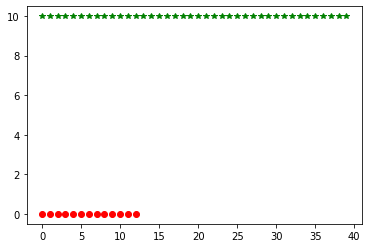

--- 2716.23828125 seconds ---
Epoch: 40	Batch training size: 64	Learning rate: 0.01

[1,  1500] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[3,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[4,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[4,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[5,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[5,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[6,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[6,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[7,  1500] loss: 1.592
Mean per class Training Accuracy[0. 1. 0.]
[7,  3000] loss: 1.010
Mean per class Training Accuracy[0

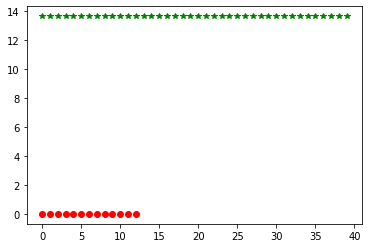

--- 2871.2977101802826 seconds ---
Epoch: 40	Batch training size: 128	Learning rate: 0.001

[1,  1500] loss: 1.013
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[4,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[5,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[6,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[7,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[8,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[9,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[10,  1500] loss: 1.301
Mean per class Training Accuracy[0. 1. 0.]
[11,  1500] loss: 1.300
Mean per class Training Accuracy[0. 1. 0.]
[12,  1500] loss: 1.300
Mean per class Training Accuracy[0. 1. 0.]
[13,  1500] loss: 1.300
Mean per class Training Accuracy[0. 1. 0.]
[14,  1500] loss: 1.300
Mean per class Trainin

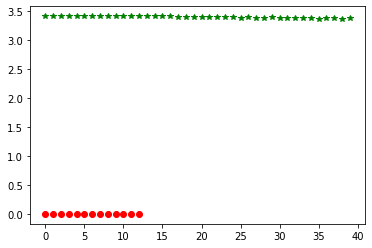

--- 2979.0823588371277 seconds ---
Epoch: 40	Batch training size: 512	Learning rate: 0.0001

Mean Training Accuracy:58.385202687121456
End of Training 

Mean per class Validation Accuracy[0.42708333 0.92701404 0.01873536]
Mean per class Validation Accuracy[0.40423353 0.9303019  0.01818182]
Mean per class Validation Accuracy[0.40772532 0.93480257 0.01705514]
Mean per class Validation Accuracy[0.41678623 0.93035191 0.01537585]
Mean per class Validation Accuracy[0.40275862 0.93823695 0.02390438]
Mean per class Validation Accuracy[0.4212751  0.93705003 0.0206422 ]
Mean per class Validation Accuracy[0.41865358 0.93622164 0.02033898]
Mean per class Validation Accuracy[0.42226148 0.93400735 0.02023121]
Mean per class Validation Accuracy[0.41005386 0.93019451 0.02217036]
Mean per class Validation Accuracy[0.40918654 0.92734964 0.01578025]
Mean per class Validation Accuracy[0.4212751  0.9283095  0.01757469]
Mean per class Validation Accuracy[0.4120438  0.92798574 0.01878788]
Mean per class Vali

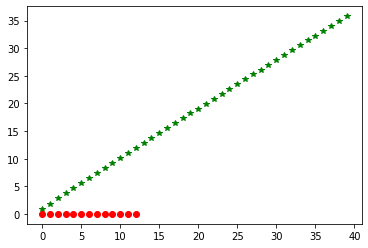

--- 3046.295013666153 seconds ---
Epoch: 60	Batch training size: 10	Learning rate: 0.005

[1,  1500] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.011
Mean per class Training Accuracy[1. 0.]
[1,  4500] loss: 1.013
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.009
Mean per class Training Accuracy[0. 1.]
[1,  7500] loss: 1.003
Mean per class Training Accuracy[0. 1.]
[1,  9000] loss: 1.013
Mean per class Training Accuracy[0. 1.]
[1, 10500] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[1, 12000] loss: 1.013
Mean per class Training Accuracy[0. 1. 0.]
[1, 13500] loss: 1.002
Mean per class Training Accuracy[0. 1. 0.]
[1, 15000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1, 16500] loss: 1.014
Mean per class Training Accuracy[0. 1. 0.]
[1, 18000] loss: 1.015
Mean per class Training Accuracy[0. 1. 0.]
[1, 19500] loss: 1.003
Mean per class Training Accuracy[0. 1. 0.]
[1, 21000] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.

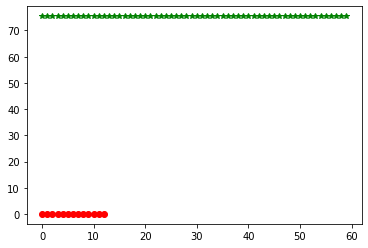

--- 4145.172866106033 seconds ---
Epoch: 60	Batch training size: 20	Learning rate: 0.05

[1,  1500] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1,  4500] loss: 1.005
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1,  7500] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[1,  9000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[1, 10500] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[1, 12000] loss: 1.009
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.262
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[2,  4500] loss: 1.005
Mean per class Training Accuracy[0. 1. 0.]
[2,  6000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[2,  7500] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[2,  9000] loss: 1.007
Mean per class Training Accura

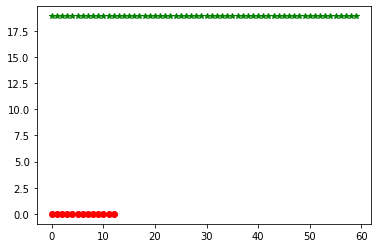

--- 4731.976264715195 seconds ---
Epoch: 60	Batch training size: 32	Learning rate: 0.1

[1,  1500] loss: 1.376
Mean per class Training Accuracy[0. 0. 1.]
[1,  3000] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[1,  4500] loss: 1.379
Mean per class Training Accuracy[0. 0. 1.]
[1,  6000] loss: 1.376
Mean per class Training Accuracy[0. 0. 1.]
[1,  7500] loss: 1.379
Mean per class Training Accuracy[0. 0. 1.]
[2,  1500] loss: 1.591
Mean per class Training Accuracy[0. 0. 1.]
[2,  3000] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[2,  4500] loss: 1.379
Mean per class Training Accuracy[0. 0. 1.]
[2,  6000] loss: 1.376
Mean per class Training Accuracy[0. 0. 1.]
[2,  7500] loss: 1.379
Mean per class Training Accuracy[0. 0. 1.]
[3,  1500] loss: 1.591
Mean per class Training Accuracy[0. 0. 1.]
[3,  3000] loss: 1.378
Mean per class Training Accuracy[0. 0. 1.]
[3,  4500] loss: 1.379
Mean per class Training Accuracy[0. 0. 1.]
[3,  6000] loss: 1.376
Mean per class Training Accurac

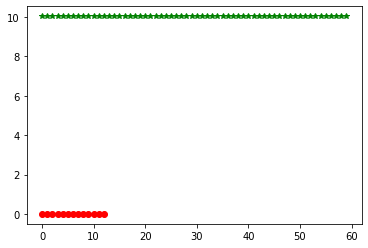

--- 5125.490557909012 seconds ---
Epoch: 60	Batch training size: 64	Learning rate: 0.01

[1,  1500] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[1,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[2,  1500] loss: 1.997
Mean per class Training Accuracy[1. 0. 0.]
[2,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[3,  1500] loss: 1.997
Mean per class Training Accuracy[1. 0. 0.]
[3,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[4,  1500] loss: 1.997
Mean per class Training Accuracy[1. 0. 0.]
[4,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[5,  1500] loss: 1.997
Mean per class Training Accuracy[1. 0. 0.]
[5,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[6,  1500] loss: 1.997
Mean per class Training Accuracy[1. 0. 0.]
[6,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[7,  1500] loss: 1.997
Mean per class Training Accuracy[1. 0. 0.]
[7,  3000] loss: 1.266
Mean per class Training Accura

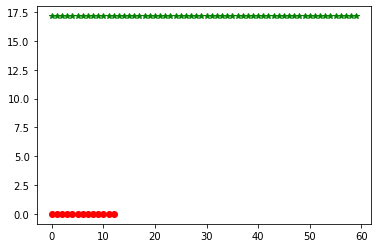

--- 5359.062036514282 seconds ---
Epoch: 60	Batch training size: 128	Learning rate: 0.001

[1,  1500] loss: 0.973
Mean per class Training Accuracy[0.13157895 0.91891892 0.        ]
[2,  1500] loss: 1.236
Mean per class Training Accuracy[0.13157895 0.95945946 0.1875    ]
[3,  1500] loss: 1.212
Mean per class Training Accuracy[0.18421053 0.95945946 0.25      ]
[4,  1500] loss: 1.187
Mean per class Training Accuracy[0.21052632 0.94594595 0.25      ]
[5,  1500] loss: 1.166
Mean per class Training Accuracy[0.21052632 0.93243243 0.25      ]
[6,  1500] loss: 1.153
Mean per class Training Accuracy[0.21052632 0.95945946 0.3125    ]
[7,  1500] loss: 1.138
Mean per class Training Accuracy[0.31578947 0.87837838 0.625     ]
[8,  1500] loss: 1.112
Mean per class Training Accuracy[0.31578947 0.90540541 0.5625    ]
[9,  1500] loss: 1.089
Mean per class Training Accuracy[0.28947368 0.86486486 0.625     ]
[10,  1500] loss: 1.082
Mean per class Training Accuracy[0.31578947 0.94594595 0.5       ]
[11,  15

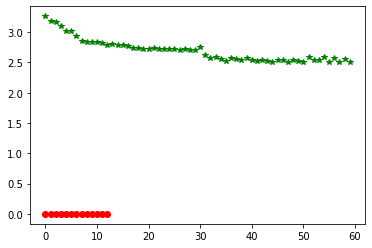

--- 5514.360723733902 seconds ---
Epoch: 60	Batch training size: 512	Learning rate: 0.0001

Mean Training Accuracy:55.31745348501106
End of Training 

Mean per class Validation Accuracy[0.         0.97434478 0.41496201]
Mean per class Validation Accuracy[0.         0.97688609 0.44404973]
Mean per class Validation Accuracy[0.         0.97270195 0.41414141]
Mean per class Validation Accuracy[0.         0.97362597 0.41046512]
Mean per class Validation Accuracy[0.         0.97574321 0.40630473]
Mean per class Validation Accuracy[0.         0.97263314 0.40681952]
Mean per class Validation Accuracy[0.         0.97472727 0.39014493]
Mean per class Validation Accuracy[0.         0.9718543  0.41911341]
Mean per class Validation Accuracy[0.         0.97319933 0.41457859]
Mean per class Validation Accuracy[0.         0.97158049 0.39367816]
Mean per class Validation Accuracy[0.         0.97227357 0.41534091]
Mean per class Validation Accuracy[0.         0.9692909  0.39988751]
Mean per class Valida

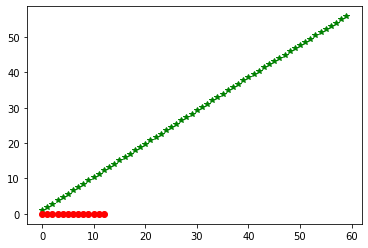

--- 5614.689445018768 seconds ---
Epoch: 80	Batch training size: 10	Learning rate: 0.005

[1,  1500] loss: 1.016
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.015
Mean per class Training Accuracy[0. 1. 0.]
[1,  4500] loss: 1.014
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.013
Mean per class Training Accuracy[0. 1. 0.]
[1,  7500] loss: 1.006
Mean per class Training Accuracy[0. 1. 0.]
[1,  9000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1, 10500] loss: 1.006
Mean per class Training Accuracy[0. 1.]
[1, 12000] loss: 1.007
Mean per class Training Accuracy[0. 1.]
[1, 13500] loss: 1.013
Mean per class Training Accuracy[0. 1. 0.]
[1, 15000] loss: 1.014
Mean per class Training Accuracy[0. 1. 0.]
[1, 16500] loss: 1.011
Mean per class Training Accuracy[0. 1.]
[1, 18000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1, 19500] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[1, 21000] loss: 1.012
Mean per class Training Accuracy[0. 1.

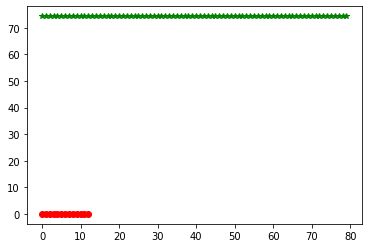

--- 7065.185337305069 seconds ---
Epoch: 80	Batch training size: 20	Learning rate: 0.05

[1,  1500] loss: 1.262
Mean per class Training Accuracy[1. 0. 0.]
[1,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[1,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[1,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[1,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[1,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[1, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[1, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[2,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[2,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[2,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[2,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[2,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[2,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[2, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[2, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[3,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[3,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[3,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[3,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[3,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[3,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[3, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[3, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[4,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[4,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[4,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[4,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[4,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[4,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[4, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[4, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[5,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[5,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[5,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[5,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[5,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[5,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[5, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[5, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[6,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[6,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[6,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[6,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[6,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[6,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[6, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[6, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[7,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[7,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[7,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[7,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[7,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[7,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[7, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[7, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[8,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[8,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[8,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[8,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[8,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[8,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[8, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[8, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[9,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[9,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[9,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[9,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[9,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[9,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[9, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[9, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[10,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[10,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[10,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[10,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[10,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[10,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[10, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[10, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[11,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[11,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[11,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[11,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[11,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[11,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[11, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[11, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[12,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[12,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[12,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[12,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[12,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[12,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[12, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[12, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[13,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[13,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[13,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[13,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[13,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[13,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[13, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[13, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[14,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[14,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[14,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[14,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[14,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[14,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[14, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[14, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[15,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[15,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[15,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[15,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[15,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[15,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[15, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[15, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[16,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[16,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[16,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[16,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[16,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[16,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[16, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[16, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[17,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[17,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[17,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[17,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[17,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[17,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[17, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[17, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[18,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[18,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[18,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[18,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[18,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[18,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[18, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[18, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[19,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[19,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[19,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[19,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[19,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[19,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[19, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[19, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[20,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[20,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[20,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[20,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[20,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[20,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[20, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[20, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[21,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[21,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[21,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[21,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[21,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[21,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[21, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[21, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[22,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[22,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[22,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[22,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[22,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[22,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[22, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[22, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[23,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[23,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[23,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[23,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[23,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[23,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[23, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[23, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[24,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[24,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[24,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[24,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[24,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[24,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[24, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[24, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[25,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[25,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[25,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[25,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[25,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[25,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[25, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[25, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[26,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[26,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[26,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[26,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[26,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[26,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[26, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[26, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[27,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[27,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[27,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[27,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[27,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[27,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[27, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[27, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[28,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[28,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[28,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[28,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[28,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[28,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[28, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[28, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[29,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[29,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[29,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[29,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[29,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[29,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[29, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[29, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[30,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[30,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[30,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[30,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[30,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[30,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[30, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[30, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[31,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[31,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[31,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[31,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[31,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[31,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[31, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[31, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[32,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[32,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[32,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[32,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[32,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[32,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[32, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[32, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[33,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[33,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[33,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[33,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[33,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[33,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[33, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[33, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[34,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[34,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[34,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[34,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[34,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[34,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[34, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[34, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[35,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[35,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[35,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[35,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[35,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[35,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[35, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[35, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[36,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[36,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[36,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[36,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[36,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[36,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[36, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[36, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[37,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[37,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[37,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[37,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[37,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[37,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[37, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[37, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[38,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[38,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[38,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[38,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[38,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[38,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[38, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[38, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[39,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[39,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[39,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[39,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[39,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[39,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[39, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[39, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[40,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[40,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[40,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[40,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[40,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[40,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[40, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[40, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[41,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[41,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[41,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[41,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[41,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[41,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[41, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[41, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[42,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[42,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[42,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[42,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[42,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[42,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[42, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[42, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[43,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[43,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[43,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[43,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[43,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[43,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[43, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[43, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[44,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[44,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[44,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[44,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[44,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[44,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[44, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[44, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[45,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[45,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[45,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[45,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[45,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[45,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[45, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[45, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[46,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[46,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[46,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[46,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[46,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[46,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[46, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[46, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[47,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[47,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[47,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[47,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[47,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[47,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[47, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[47, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[48,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[48,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[48,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[48,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[48,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[48,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[48, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[48, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[49,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[49,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[49,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[49,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[49,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[49,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[49, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[49, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[50,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[50,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[50,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[50,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[50,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[50,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[50, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[50, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[51,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[51,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[51,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[51,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[51,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[51,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[51, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[51, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[52,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[52,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[52,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[52,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[52,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[52,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[52, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[52, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[53,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[53,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[53,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[53,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[53,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[53,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[53, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[53, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[54,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[54,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[54,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[54,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[54,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[54,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[54, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[54, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[55,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[55,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[55,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[55,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[55,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[55,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[55, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[55, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[56,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[56,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[56,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[56,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[56,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[56,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[56, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[56, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[57,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[57,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[57,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[57,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[57,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[57,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[57, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[57, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[58,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[58,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[58,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[58,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[58,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[58,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[58, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[58, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[59,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[59,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[59,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[59,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[59,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[59,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[59, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[59, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[60,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[60,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[60,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[60,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[60,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[60,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[60, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[60, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[61,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[61,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[61,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[61,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[61,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[61,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[61, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[61, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[62,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[62,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[62,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[62,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[62,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[62,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[62, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[62, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[63,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[63,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[63,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[63,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[63,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[63,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[63, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[63, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[64,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[64,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[64,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[64,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[64,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[64,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[64, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[64, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[65,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[65,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[65,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[65,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[65,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[65,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[65, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[65, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[66,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[66,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[66,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[66,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[66,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[66,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[66, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[66, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[67,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[67,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[67,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[67,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[67,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[67,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[67, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[67, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[68,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[68,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[68,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[68,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[68,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[68,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[68, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[68, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[69,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[69,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[69,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[69,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[69,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[69,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[69, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[69, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[70,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[70,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[70,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[70,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[70,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[70,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[70, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[70, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[71,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[71,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[71,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[71,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[71,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[71,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[71, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[71, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[72,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[72,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[72,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[72,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[72,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[72,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[72, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[72, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[73,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[73,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[73,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[73,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[73,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[73,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[73, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[73, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[74,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[74,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[74,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[74,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[74,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[74,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[74, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[74, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[75,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[75,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[75,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[75,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[75,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[75,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[75, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[75, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[76,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[76,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[76,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[76,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[76,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[76,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[76, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[76, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[77,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[77,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[77,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[77,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[77,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[77,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[77, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[77, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[78,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[78,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[78,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[78,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[78,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[78,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[78, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[78, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[79,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[79,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[79,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[79,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[79,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[79,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[79, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[79, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[80,  1500] loss: 1.586
Mean per class Training Accuracy[1. 0. 0.]
[80,  3000] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[80,  4500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[80,  6000] loss: 1.267
Mean per class Training Accuracy[nan  0.  0.]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: RuntimeWarning: invalid value encountered in true_divide


[80,  7500] loss: 1.266
Mean per class Training Accuracy[1. 0. 0.]
[80,  9000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[80, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[80, 12000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
Mean Training Accuracy:28.475346479521008
End of Training 

Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean per class Validation Accuracy[1. 0. 0.]
Mean Validation Accuracy on validate data: 28 %
End of validation 

Mean per class Test

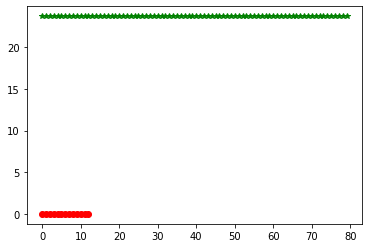

--- 7874.092004537582 seconds ---
Epoch: 80	Batch training size: 32	Learning rate: 0.1

[1,  1500] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1,  4500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1,  7500] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.166
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[2,  4500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[2,  6000] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[2,  7500] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.166
Mean per class Training Accuracy[0. 1. 0.]
[3,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[3,  4500] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[3,  6000] loss: 1.008
Mean per class Training Accurac

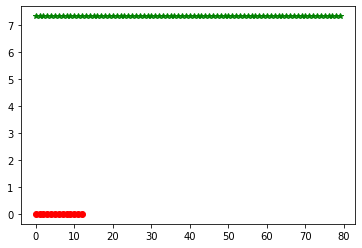

--- 8416.523466825485 seconds ---
Epoch: 80	Batch training size: 64	Learning rate: 0.01

[1,  1500] loss: 1.019
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[3,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[4,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[4,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[5,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[5,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[6,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[6,  3000] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[7,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[7,  3000] loss: 1.011
Mean per class Training Accura

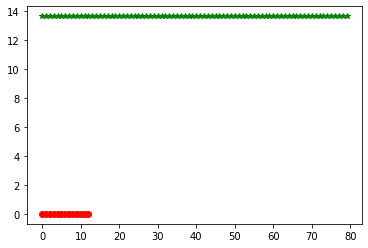

--- 8734.354951381683 seconds ---
Epoch: 80	Batch training size: 128	Learning rate: 0.001

[1,  1500] loss: 0.993
Mean per class Training Accuracy[0.37837838 0.91549296 0.        ]
[2,  1500] loss: 1.229
Mean per class Training Accuracy[0.40540541 0.87323944 0.        ]
[3,  1500] loss: 1.210
Mean per class Training Accuracy[0.45945946 0.91549296 0.        ]
[4,  1500] loss: 1.197
Mean per class Training Accuracy[0.45945946 0.98591549 0.        ]
[5,  1500] loss: 1.192
Mean per class Training Accuracy[0.48648649 0.97183099 0.        ]
[6,  1500] loss: 1.190
Mean per class Training Accuracy[0.45945946 0.92957746 0.        ]
[7,  1500] loss: 1.178
Mean per class Training Accuracy[0.48648649 0.81690141 0.35      ]
[8,  1500] loss: 1.167
Mean per class Training Accuracy[0.48648649 0.94366197 0.        ]
[9,  1500] loss: 1.155
Mean per class Training Accuracy[0.43243243 0.87323944 0.        ]
[10,  1500] loss: 1.161
Mean per class Training Accuracy[0.40540541 0.90140845 0.25      ]
[11,  15

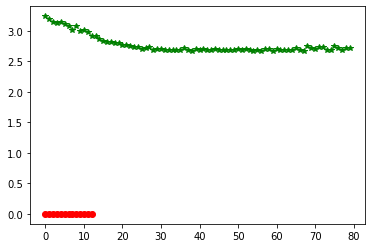

--- 8947.854121208191 seconds ---
Epoch: 80	Batch training size: 512	Learning rate: 0.0001

Mean Training Accuracy:59.84751949036382
End of Training 

Mean per class Validation Accuracy[0.59359431 0.86225997 0.48083427]
Mean per class Validation Accuracy[0.59413635 0.86386955 0.49327878]
Mean per class Validation Accuracy[0.60752307 0.85999268 0.48835856]
Mean per class Validation Accuracy[0.58294518 0.86578171 0.49915966]
Mean per class Validation Accuracy[0.60089378 0.85954741 0.49598624]
Mean per class Validation Accuracy[0.58307745 0.86762242 0.49469965]
Mean per class Validation Accuracy[0.58001448 0.85877655 0.47426258]
Mean per class Validation Accuracy[0.58183702 0.86341555 0.49885845]
Mean per class Validation Accuracy[0.59338787 0.86407586 0.49526066]
Mean per class Validation Accuracy[0.58126722 0.86650531 0.48347826]
Mean per class Validation Accuracy[0.60296143 0.86630312 0.49718785]
Mean per class Validation Accuracy[0.59656502 0.85498712 0.48569761]
Mean per class Valida

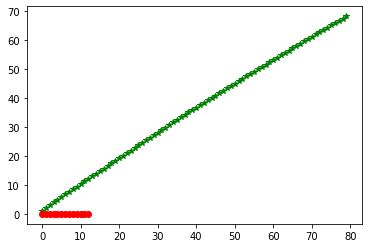

--- 9082.190045118332 seconds ---
Epoch: 100	Batch training size: 10	Learning rate: 0.005

[1,  1500] loss: 1.275
Mean per class Training Accuracy[1. 0. 0.]
[1,  3000] loss: 1.265
Mean per class Training Accuracy[1. 0. 0.]
[1,  4500] loss: 1.268
Mean per class Training Accuracy[1. 0.]
[1,  6000] loss: 1.262
Mean per class Training Accuracy[1. 0. 0.]
[1,  7500] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[1,  9000] loss: 1.275
Mean per class Training Accuracy[1. 0.]
[1, 10500] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[1, 12000] loss: 1.265
Mean per class Training Accuracy[1. 0.]
[1, 13500] loss: 1.267
Mean per class Training Accuracy[1. 0. 0.]
[1, 15000] loss: 1.264
Mean per class Training Accuracy[1. 0. 0.]
[1, 16500] loss: 1.270
Mean per class Training Accuracy[1. 0. 0.]
[1, 18000] loss: 1.268
Mean per class Training Accuracy[1. 0. 0.]
[1, 19500] loss: 1.259
Mean per class Training Accuracy[1. 0. 0.]
[1, 21000] loss: 1.265
Mean per class Training Accuracy[1. 0

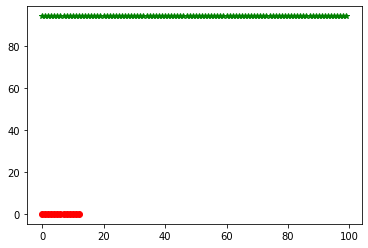

--- 10962.272516965866 seconds ---
Epoch: 100	Batch training size: 20	Learning rate: 0.05

[1,  1500] loss: 1.041
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[1,  4500] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[1,  7500] loss: 1.013
Mean per class Training Accuracy[0. 1. 0.]
[1,  9000] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[1, 10500] loss: 1.002
Mean per class Training Accuracy[0. 1. 0.]
[1, 12000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.258
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[2,  4500] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[2,  6000] loss: 1.012
Mean per class Training Accuracy[0. 1. 0.]
[2,  7500] loss: 1.013
Mean per class Training Accuracy[0. 1. 0.]
[2,  9000] loss: 1.012
Mean per class Training Accu

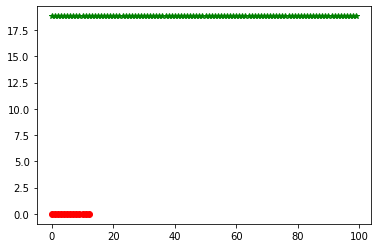

--- 11971.339229106903 seconds ---
Epoch: 100	Batch training size: 32	Learning rate: 0.1

[1,  1500] loss: 1.011
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[1,  4500] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[1,  6000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[1,  7500] loss: 1.014
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.167
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[2,  4500] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[2,  6000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[2,  7500] loss: 1.014
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.167
Mean per class Training Accuracy[0. 1. 0.]
[3,  3000] loss: 1.008
Mean per class Training Accuracy[0. 1. 0.]
[3,  4500] loss: 1.007
Mean per class Training Accuracy[0. 1. 0.]
[3,  6000] loss: 1.010
Mean per class Training Accur

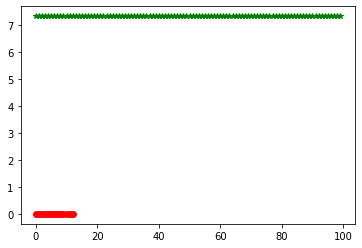

--- 12645.714473485947 seconds ---
Epoch: 100	Batch training size: 64	Learning rate: 0.01

[1,  1500] loss: 1.014
Mean per class Training Accuracy[0. 1. 0.]
[1,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[2,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[2,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[3,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[3,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[4,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[4,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[5,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[5,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[6,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[6,  3000] loss: 1.010
Mean per class Training Accuracy[0. 1. 0.]
[7,  1500] loss: 1.591
Mean per class Training Accuracy[0. 1. 0.]
[7,  3000] loss: 1.010
Mean per class Training Accu

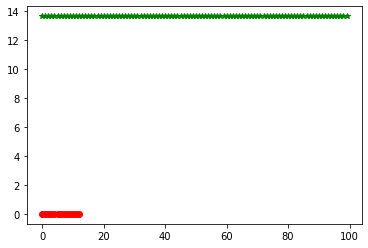

--- 13040.80866575241 seconds ---
Epoch: 100	Batch training size: 128	Learning rate: 0.001

[1,  1500] loss: 0.986
Mean per class Training Accuracy[0.29166667 0.98387097 0.        ]
[2,  1500] loss: 1.227
Mean per class Training Accuracy[0.29166667 0.98387097 0.05555556]
[3,  1500] loss: 1.210
Mean per class Training Accuracy[0.52083333 0.9516129  0.05555556]
[4,  1500] loss: 1.200
Mean per class Training Accuracy[0.52083333 0.98387097 0.05555556]
[5,  1500] loss: 1.194
Mean per class Training Accuracy[0.54166667 0.98387097 0.05555556]
[6,  1500] loss: 1.190
Mean per class Training Accuracy[0.5625     0.98387097 0.05555556]
[7,  1500] loss: 1.188
Mean per class Training Accuracy[0.58333333 0.96774194 0.05555556]
[8,  1500] loss: 1.184
Mean per class Training Accuracy[0.52083333 1.         0.05555556]
[9,  1500] loss: 1.181
Mean per class Training Accuracy[0.5625     0.96774194 0.05555556]
[10,  1500] loss: 1.177
Mean per class Training Accuracy[0.54166667 0.98387097 0.05555556]
[11,  1

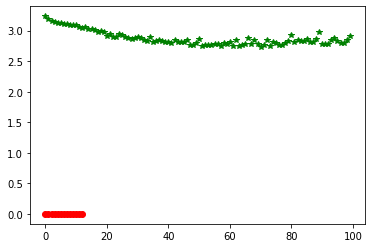

--- 13302.655902147293 seconds ---
Epoch: 100	Batch training size: 512	Learning rate: 0.0001

Mean Training Accuracy:49.75272174483475
End of Training 

Mean per class Validation Accuracy[0.5043691  0.95676482 0.1534123 ]
Mean per class Validation Accuracy[0.51998585 0.95238095 0.15315315]
Mean per class Validation Accuracy[0.49912557 0.95058565 0.15921288]
Mean per class Validation Accuracy[0.51073407 0.95362158 0.15647059]
Mean per class Validation Accuracy[0.50142349 0.95469613 0.14602273]
Mean per class Validation Accuracy[0.51908669 0.95976591 0.17119722]
Mean per class Validation Accuracy[0.52805398 0.95519085 0.1391255 ]
Mean per class Validation Accuracy[0.50603656 0.95588778 0.13844326]
Mean per class Validation Accuracy[0.51399931 0.94865067 0.14398645]
Mean per class Validation Accuracy[0.49927326 0.95647443 0.16320646]
Mean per class Validation Accuracy[0.49753173 0.95467999 0.15017065]
Mean per class Validation Accuracy[0.50996564 0.95502646 0.14905451]
Mean per class Vali

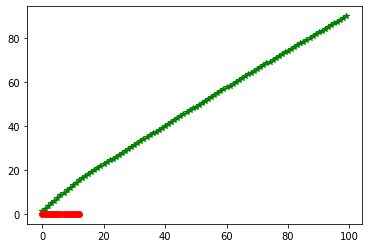

--- 13485.146840333939 seconds ---


In [ ]:
# for simplicity seeing test/validation accuracy at each epoch and for each learning rate
# run multiple time with a list of paramete for best parameter and model selection
import time
start_time = time.time()
print("Running DNN on SWELL dataset: \n")
for epch in range(len(Epoch)):
  for batch_s in range(len(batch_train)):
    #ff_nn_model = FFNNetModel(input_dim, hidden_dim, output_dim)
    train_validate_test(Epoch[epch], batch_train[batch_s], batch_val, batch_test, LR[batch_s], hidden_dim)
    print("--- %s seconds ---" % (time.time() - start_time))